In [1]:
# import libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

sns.set()

# science format
science = {
            # Set line widths
            'axes.linewidth' : 0.5,
            'grid.linewidth' : 0.5,
            'lines.linewidth' : 1.,

            # Remove legend frame
            'legend.frameon' : False,

            # Always save as 'tight'
            'savefig.bbox' : 'tight',
            'savefig.pad_inches' : 0.05,

            # Use serif fonts
            # 'font.serif' : 'Times',
            'font.family' : 'serif',
            'mathtext.fontset' : 'dejavuserif',
    
            # Set y axis
            'ytick.direction' : 'out',
            'ytick.major.size' : 3,
            'ytick.major.width' : 0.5,
            'ytick.minor.size' : 1.5,
            'ytick.minor.width' : 0.5,
            'ytick.minor.visible' : True,
    
            # Set x axis
            'xtick.direction' : 'out',
            'xtick.major.size' : 3,
            'xtick.major.width' : 0.5,
            'xtick.minor.size' : 1.5,
            'xtick.minor.width' : 0.5,
            'xtick.minor.visible' : True
           }

# set sns theme with science format
sns.set_theme(style='ticks', rc=science)

print("Using Vibrant qualitative colour scheme from https://personal.sron.nl/~pault/\n")

model_colors = dict(zip(['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS', 'Neutral'],
                        ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']))

print(model_colors)

sns.color_palette(['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB'])

Using Vibrant qualitative colour scheme from https://personal.sron.nl/~pault/

{'OF': '#EE7733', 'AF2': '#0077BB', 'IF': '#33BBEE', 'NN': '#EE3377', 'ESM': '#CC3311', 'YS': '#009988', 'Neutral': '#BBBBBB'}


[(0.9333333333333333, 0.4666666666666667, 0.2),
 (0.0, 0.4666666666666667, 0.7333333333333333),
 (0.2, 0.7333333333333333, 0.9333333333333333),
 (0.9333333333333333, 0.2, 0.4666666666666667),
 (0.8, 0.2, 0.06666666666666667),
 (0.0, 0.6, 0.5333333333333333),
 (0.7333333333333333, 0.7333333333333333, 0.7333333333333333)]

## Figure 1

In [2]:
ident_vs_rest_pdbs = pd.read_csv('csv_data/ident_vs_rest_pdb.csv', index_col=0).sort_index().sort_index(axis=1)

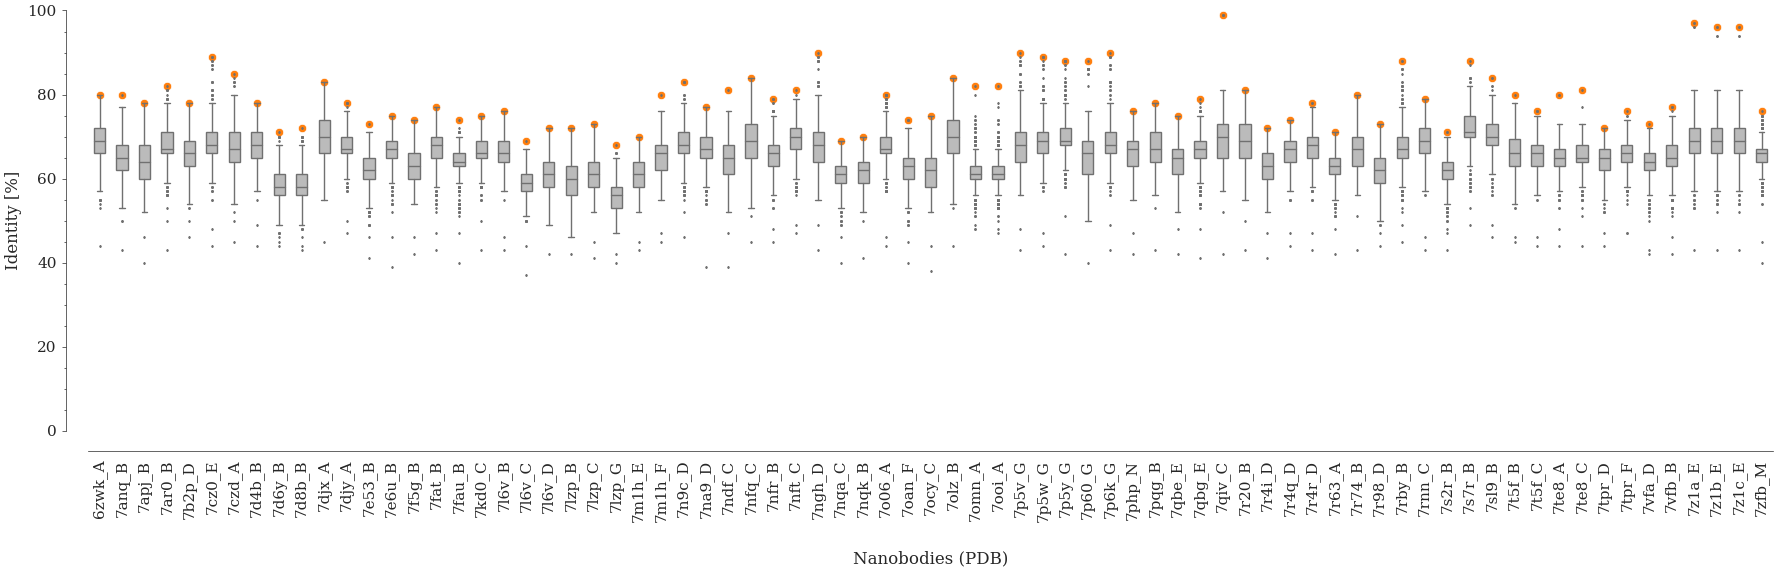

In [3]:
m = []
n = {}
c = 0
for i in ident_vs_rest_pdbs:
	mx = 0
	c +=1
	# print(i, c)
	for idx, v in zip(ident_vs_rest_pdbs[i].index, ident_vs_rest_pdbs[i].values):
		if v > mx and idx != i:
			mx = v
			idxmx = idx
	m.append((i, mx, idxmx))
	n[i] = mx

# ident_vs_rest_pdbs
plt.figure(figsize=(18, 6))

ax = sns.boxplot(data=ident_vs_rest_pdbs.sort_index(), width=0.5, fliersize=1, 
                 color='#BBBBBB')
sns.scatterplot(x=list(x[0] for x in m), y=list(x[1] for x in m), color=sns.color_palette('tab10')[1])

# set axes labels
ax.set_ylabel("Identity [%]")
ax.set_xlabel('Nanobodies (PDB)', labelpad=20)

# set new positions for axes
ax.spines['left'].set_position(('data', -0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])))
ax.spines['bottom'].set_position(('data', -0.07 * (ax.get_ylim()[1] - ax.get_ylim()[0])))

# rotate xticks
l = plt.xticks(rotation=90)

# despine top and right
sns.despine(top=True, right=True)

# set new limits on y axis
ax.set_ylim(0,100)

# delete xticks
ax.xaxis.set_ticks_position('none')

plt.tight_layout()

plt.savefig('figures/figure1.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figure1.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 1.** Distribution of sequence identities for each Nb in the dataset with the rest
of the Nbs in the SAbDaB database. The sequence identity distributions are
represented by a boxplot. The lower and upper edges of the box represent the first
(Q1) and third quartile (Q3), respectively. The difference Q3 - Q1 is known as the
interquartile range (IQR). Whiskers extend to the minimum and maximum points
within ±1.5 × IQR, respectively. In this case, the maximum value of sequence identity
for each distribution is represented as an orange dot.

## Figure S1

In [4]:
resolution = pd.read_csv('csv_data/resolution.csv', index_col=0)
resolution

,index,resolution
0,7r20_B,1.42
1,7p6k_G,3.80
2,7apj_B,2.05
3,7r4q_D,3.60
4,7l6v_B,2.01
...,...,...
70,7l6v_C,2.01
71,7oan_F,3.00
72,7t5f_B,2.60
73,7p5y_G,3.29


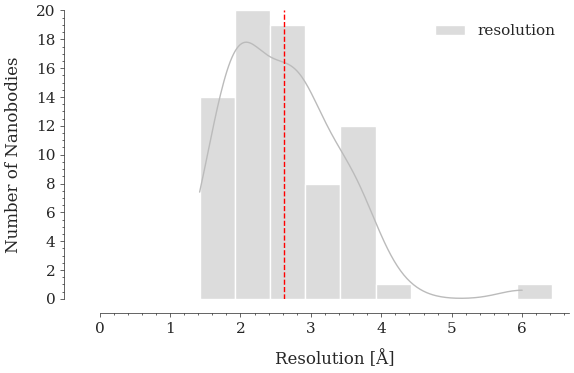

In [5]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(6, 4))

ax = sns.histplot(resolution, kde=True,
                  palette=['#BBBBBB'], binwidth=0.5)

ax.axvline(resolution['resolution'].mean(), color='red', ls='--')

# set axes labels
ax.set_ylabel("Number of Nanobodies", labelpad=10)
ax.set_xlabel('Resolution [Å]', labelpad=10)

# set new positions for axes
ax.spines['left'].set_position(('data', -0.5))
ax.spines['bottom'].set_position(('data', -1))

# despine top and right
sns.despine(top=True, right=True)

# set new limits on axes
ax.set_ylim(0, 20)
ax.set_xlim(0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

plt.savefig('figures/figureS1.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS1.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S1.** Resolution distribution of crystallographic structures of Nbs in the dataset. The vertical red dashed line represents the median resolution value.

## Figure S2

In [6]:
int_seq_ident = pd.read_csv('csv_data/internal_ident.csv', index_col=0)
int_seq_ident

,6zwk_A,7anq_B,7apj_B,7ar0_B,7b2p_D,7cz0_E,7czd_A,7d4b_B,7d6y_B,7d8b_B,...,7te8_A,7te8_C,7tpr_D,7tpr_F,7vfa_D,7vfb_B,7z1a_E,7z1b_E,7z1c_E,7zfb_M
6zwk_A,100,71,65,72,68,69,67,71,59,59,...,67,65,67,66,66,68,70,70,70,68
7anq_B,71,100,62,72,63,64,61,67,56,55,...,61,63,62,65,61,66,72,72,72,65
7apj_B,65,62,100,64,64,72,63,69,56,56,...,62,60,61,62,61,60,64,64,65,63
7ar0_B,72,72,64,100,65,68,67,68,57,58,...,69,67,65,67,70,71,76,76,76,64
7b2p_D,68,63,64,65,100,69,76,67,65,65,...,63,65,65,69,62,60,64,64,64,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7vfb_B,68,66,60,71,60,65,63,68,56,56,...,63,62,68,70,70,100,70,70,70,66
7z1a_E,70,72,64,76,64,69,65,71,61,61,...,66,66,63,68,65,70,100,97,97,66
7z1b_E,70,72,64,76,64,69,65,70,60,62,...,66,66,63,68,65,70,97,100,98,67
7z1c_E,70,72,65,76,64,70,65,71,59,62,...,66,66,63,68,65,70,97,98,100,65


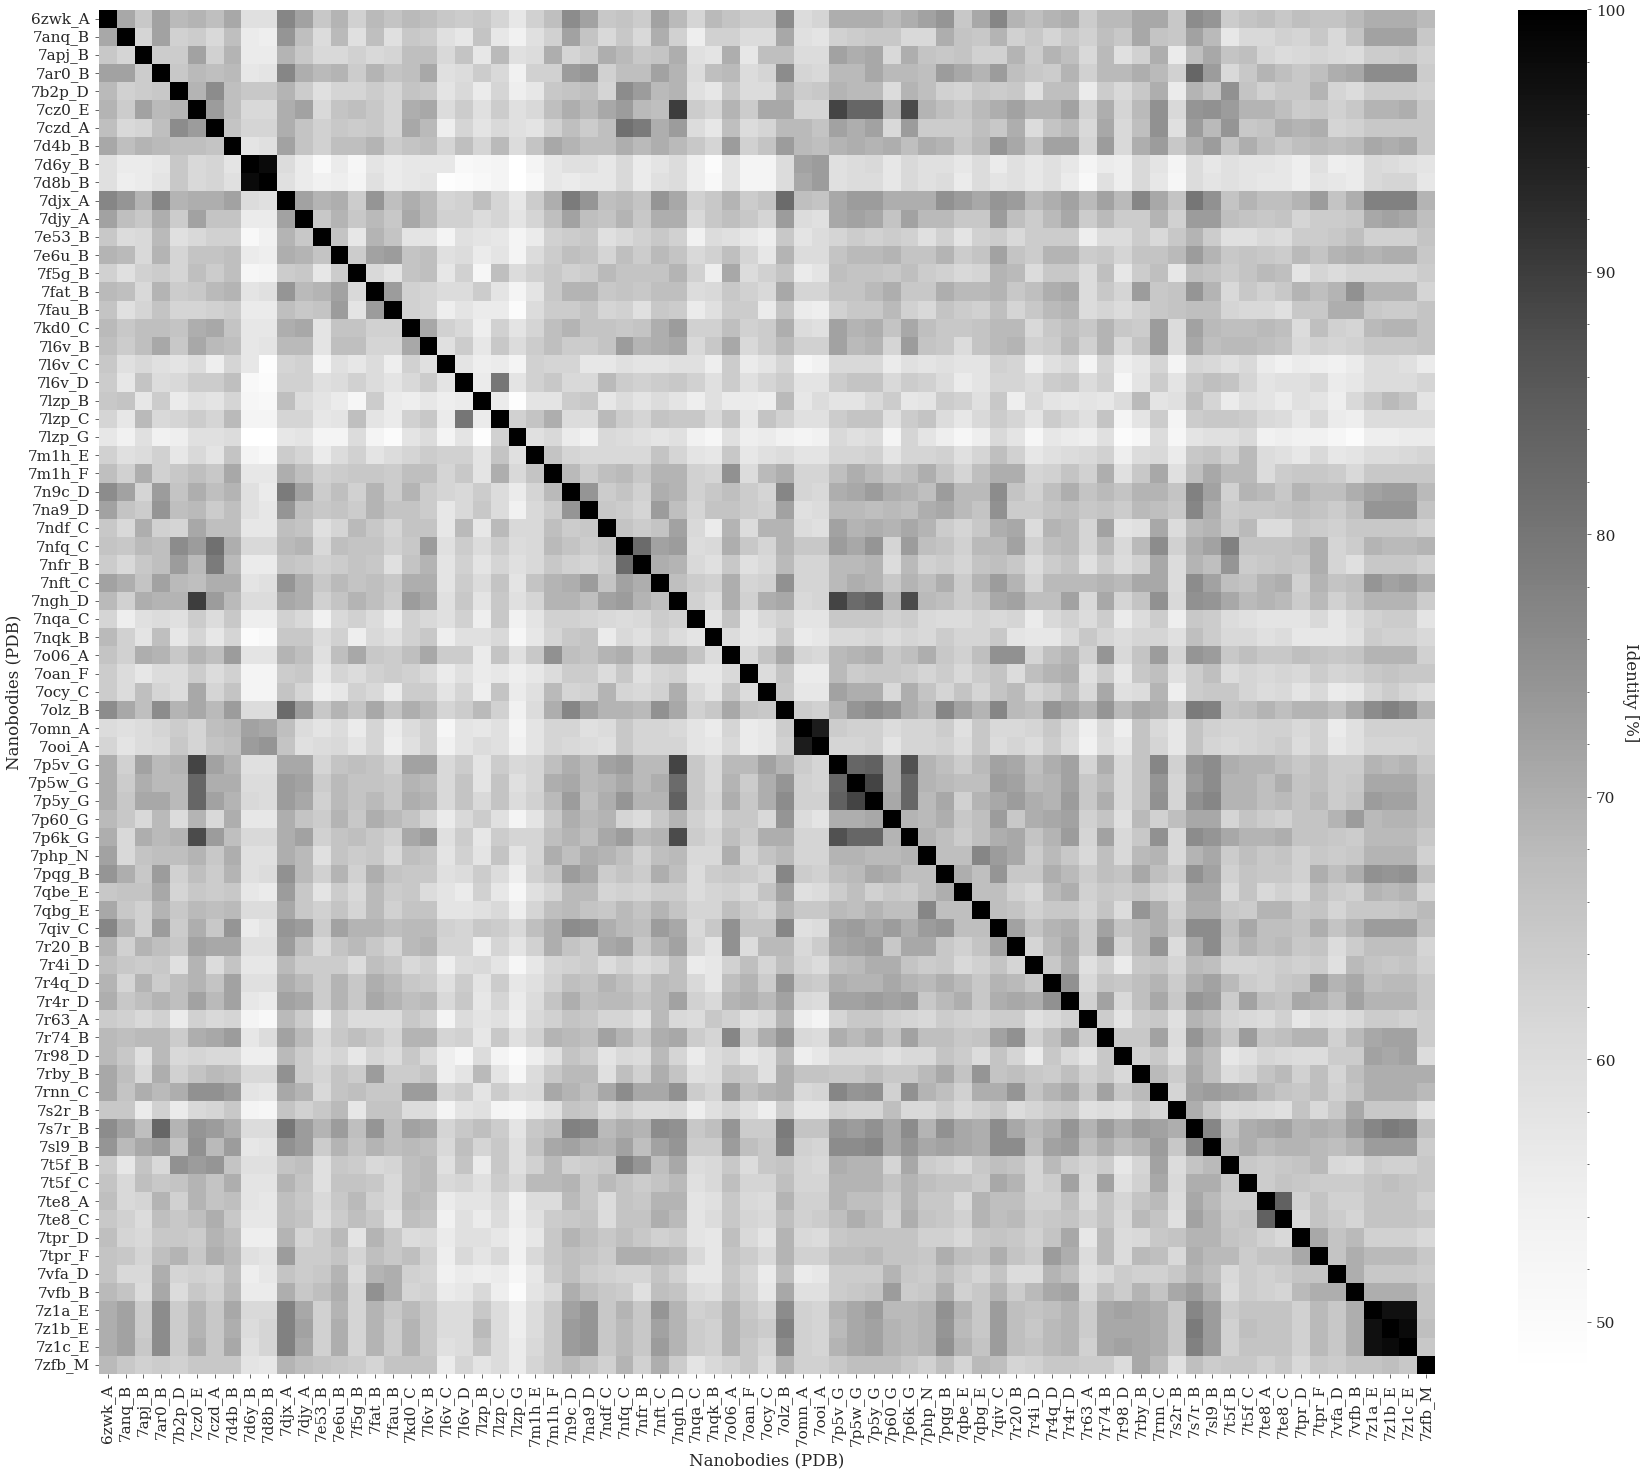

In [7]:
plt.figure(figsize=(18, 15))
ax = sns.heatmap(int_seq_ident, cmap='Greys', xticklabels=1, yticklabels=1)

# set axes labels
ax.set_ylabel('Nanobodies (PDB)')
ax.set_xlabel('Nanobodies (PDB)')

# rotate cbar y label
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Identity [%]', rotation=270, va='center')

# disable minor ticks
plt.minorticks_off()

plt.tight_layout()

plt.savefig('figures/figureS2.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS2.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S2.** Sequence identity among Nbs in the dataset. Only 4 Nbs have sequence identities greater than 95%.

In [8]:
# Utility functions

from matplotlib.patches import PathPatch
import numpy as np
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

## Figure 2

In [9]:
models_df = pd.read_csv('csv_data/models_metrics_origin.csv', index_col=0)
models_df

,model,Number of residues in common,global rmsd,TM-score,MaxSub-score,GDT-TS-score,GDT-TS-score %(d<1),GDT-TS-score %(d<2),GDT-TS-score %(d<4),GDT-TS-score %(d<8),GDT-HA-score,GDT-HA-score %(d<0.5),GDT-HA-score %(d<1),GDT-HA-score %(d<2),GDT-HA-score %(d<4),TM-score Superposition Length(d<5.0),CDR3 length
7d8b_B,IF,132,6.074,0.8480,0.8231,0.8409,0.7500,0.8409,0.8712,0.9015,0.7557,0.5606,0.7500,0.8409,0.8712,113,24
7d8b_B,ESMem,132,3.830,0.8837,0.8538,0.8731,0.7576,0.8864,0.9091,0.9394,0.7689,0.5227,0.7576,0.8864,0.9091,119,24
7d8b_B,AF2m,132,3.054,0.8869,0.8523,0.8920,0.8030,0.8788,0.8939,0.9924,0.8049,0.6439,0.8030,0.8788,0.8939,118,24
7d8b_B,ESM,132,3.664,0.8940,0.8695,0.8883,0.8030,0.8939,0.9091,0.9470,0.8087,0.6288,0.8030,0.8939,0.9091,119,24
7d8b_B,AF2r10,132,3.734,0.8878,0.8608,0.8788,0.7879,0.8712,0.9091,0.9470,0.7936,0.6061,0.7879,0.8712,0.9091,120,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7z1b_E,YSem,127,2.228,0.8690,0.8099,0.8307,0.5512,0.8346,0.9370,1.0000,0.6339,0.2126,0.5512,0.8346,0.9370,121,18
7z1b_E,AF2r10,127,1.560,0.9251,0.8880,0.9154,0.7953,0.8898,0.9764,1.0000,0.8209,0.6220,0.7953,0.8898,0.9764,123,18
7z1b_E,OFr4,127,1.766,0.9220,0.8813,0.9252,0.8504,0.8898,0.9606,1.0000,0.8425,0.6693,0.8504,0.8898,0.9606,119,18
7z1b_E,AF2,127,1.455,0.9304,0.8930,0.9232,0.8031,0.8976,0.9921,1.0000,0.8327,0.6378,0.8031,0.8976,0.9921,125,18


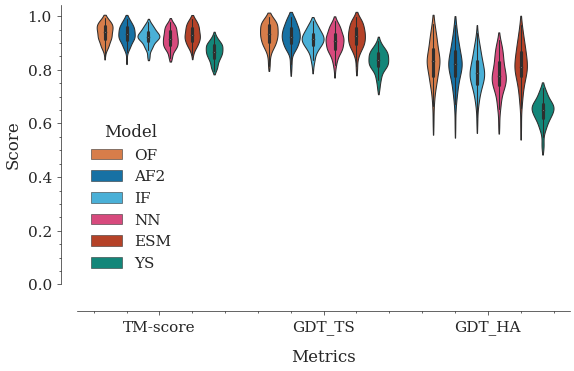

In [10]:
tms = models_df[['TM-score', 'model']]
tms.columns = ['Value', 'model']
tms['metric'] = len(tms) * ['TM-score']

# print('TM-score < 0.9')
# print(tms[tms['Value'] < 0.9]['model'].value_counts())
# print(40*'-')

mss = models_df[['MaxSub-score', 'model']]
mss.columns = ['Value', 'model']
mss['metric'] = len(mss) * ['MaxSub-score']
gdt_ts = models_df[['GDT-TS-score', 'model']]
gdt_ts.columns = ['Value', 'model']
gdt_ts['metric'] = len(gdt_ts) * ['GDT_TS']
gdt_ha = models_df[['GDT-HA-score', 'model']]
gdt_ha.columns = ['Value', 'model']
gdt_ha['metric'] = len(gdt_ha) * ['GDT_HA']
rmsd = models_df[['global rmsd', 'model']]
rmsd.columns = ['Value', 'model']
rmsd['metric'] = len(tms) * ['RMSD']
mts = pd.concat([tms, gdt_ts, gdt_ha]).reset_index()
mts.columns = ['PDB', 'Value', 'model', 'metric']
mts2 = mts[mts['model'].isin(['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'])]

sns.color_palette("pastel")

# scores
plt.figure(figsize=(6, 4))

ax = sns.violinplot(data=mts2, x='metric', y='Value', hue='model',  dodge=True, size=2.5, linewidth=0.75,
                    hue_order=['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'],
                    palette=['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988'],
                    cut=1)

# set axes labels
ax.set_ylabel('Score')
ax.set_xlabel('Metrics', labelpad=10)

# set y limits
ax.set_ylim(0)

# Change legend name
ax.legend(title='Model')

# despine top and right
sns.despine(top=True, right=True)

# set new positions for axes
ax.spines['left'].set_position(('data', -0.6))
ax.spines['bottom'].set_position(('data', -0.1))

plt.tight_layout()

plt.savefig('figures/figure2.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figure2.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 2.** Assessment of the modeling accuracy of the six AI programs using global superposition metrics (TM-score, GDT-TS, and GDT-HA). For each program, the distribution of metric values is represented by a violin plot. It combines the kernel density plot (outer) to show the distribution of values and a boxplot (inner) that summarizes the distribution statistics. The boxplot is composed of the white dot representing the median, the thick gray bar in the center representing the interquartile range, and the thin gray line representing the rest of the distribution.

In [11]:
from scipy.stats import kruskal

def sig(x):

        """
        P > 0.05 ns
        P ≤ 0.05 *
        P ≤ 0.01 **
        P ≤ 0.001 ***
        P ≤ 0.0001 ****
        """

        if x > 0.05:
            return 'ns'
        elif x <= 0.0001:
            return '****'
        elif x <= 0.001:
            return '***'
        elif x <= 0.01:
            return '**'
        elif x <= 0.05:
            return '*'

df_stats_metrics = pd.DataFrame()

models = ['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS']

for metric in ['TM-score', 'GDT_TS', 'GDT_HA']:
    
    print(f'Working on {metric}')
    
    # Sample data
    group1 = mts2[(mts2['metric'] == metric) & (mts2['model'] == 'OF')]['Value'].to_list()
    group2 = mts2[(mts2['metric'] == metric) & (mts2['model'] == 'AF2')]['Value'].to_list()
    group3 = mts2[(mts2['metric'] == metric) & (mts2['model'] == 'IF')]['Value'].to_list()
    group4 = mts2[(mts2['metric'] == metric) & (mts2['model'] == 'NN')]['Value'].to_list()
    group5 = mts2[(mts2['metric'] == metric) & (mts2['model'] == 'ESM')]['Value'].to_list()
    group6 = mts2[(mts2['metric'] == metric) & (mts2['model'] == 'YS')]['Value'].to_list()

    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(group1, group2, group3, group4, group5, group6)

    # Print the test statistic and p-value
    print("Test statistic:", stat)
    print("p-value:", p_value)

    # Check the p-value against a significance level (e.g. 0.05)
    if p_value < 0.05:
        
        print("Reject the null hypothesis, there is a significant difference among the groups.")
        
        # Define data
        data = [group1, group2, group3, group4, group5, group6]

        # Perform Dunn's test using a fdr_bh correction for the p-values
        import scikit_posthocs as sp

        post_dunn = sp.posthoc_dunn(data, p_adjust = 'fdr_bh')

        post_dunn.columns = models
        post_dunn.index = models

        post_dunn_proc = post_dunn.applymap(lambda x: sig(x)).stack().reset_index()
        post_dunn_proc = post_dunn_proc.rename(columns={'level_0': 'Method1', 'level_1': 'Method2', 0: metric})
        post_dunn_proc = post_dunn_proc[post_dunn_proc['Method1'] != post_dunn_proc['Method2']].reset_index(drop=True)

        df1 = pd.DataFrame(np.sort(post_dunn_proc[['Method1', 'Method2']], axis=1))

        # post_dunn_proc = post_dunn_proc[~df1.duplicated()].reset_index(drop=True)

        df_stats_metrics = pd.concat([df_stats_metrics, post_dunn_proc], axis=1)
        
    else:
        print("Fail to reject the null hypothesis, there is no significant difference among the groups.")

Working on TM-score
Test statistic: 138.3641754632428
p-value: 3.9841638130589164e-28
Reject the null hypothesis, there is a significant difference among the groups.
Working on GDT_TS
Test statistic: 157.23413337154085
p-value: 3.8453900728572836e-32
Reject the null hypothesis, there is a significant difference among the groups.
Working on GDT_HA
Test statistic: 175.614820100696
p-value: 4.62151668624742e-36
Reject the null hypothesis, there is a significant difference among the groups.


## Figure 3

In [12]:
rmsd_by_region = pd.read_csv('csv_data/rmsd_by_region.csv', index_col=0)
rmsd_by_region

,PDB,model,Fragment,rmsd atoms,RMSD
0,7n9c_D,IF,Fw,ca,1.3
1,7n9c_D,IF,Fw,bb,1.3
2,7n9c_D,IF,Fw,all,2.0
3,7n9c_D,IF,CDR1,ca,2.0
4,7n9c_D,IF,CDR1,bb,2.1
...,...,...,...,...,...
21475,7r4q_D,OFr4,CDR3,bb,4.1
21476,7r4q_D,OFr4,CDR3,all,5.2
21477,7r4q_D,OFr4,Global,ca,1.7
21478,7r4q_D,OFr4,Global,bb,1.7


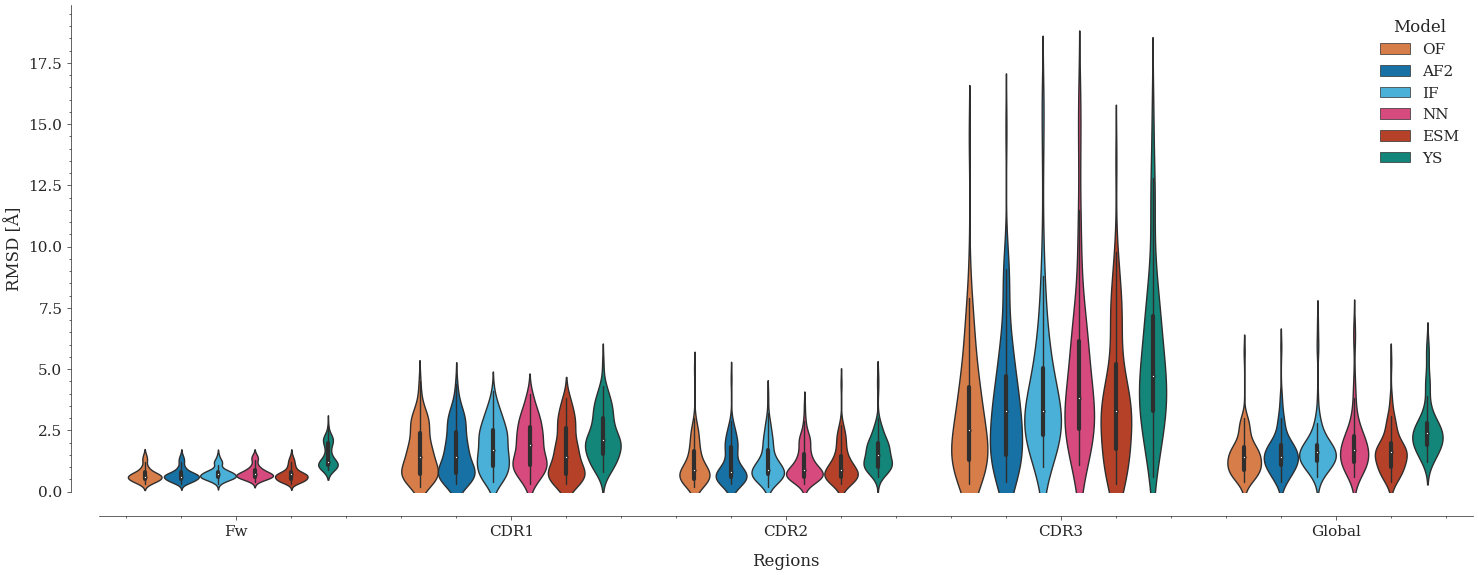

In [13]:
plt.figure(figsize=(15, 6))

ax = sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['model'].isin(['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'])) &
        (rmsd_by_region['rmsd atoms'].isin(['ca']))],
    y="RMSD",
    x="Fragment",
    hue="model",
    hue_order=['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'],
    palette=['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988']
                 )
# set axes labels
ax.set_ylabel('RMSD [Å]')
ax.set_xlabel('Regions', labelpad=10)

# set ylim
ax.set_ylim(0)

# set legend title
ax.legend(title='Model')

# despine top and right
sns.despine(top=True, right=True)

# set new positions for axes
ax.spines['left'].set_position(('data', -0.6))
ax.spines['bottom'].set_position(('data', -1))

plt.tight_layout()

plt.savefig('figures/figure3.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figure3.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 3.** Assessment of modeling accuracy using RMSD by fragment for OmegaFold, AlphaFold2, IgFold, Nanonet, ESMFold, and Yang-Server. For each region, the RMSD distributions are represented by a violin plot. It combines the kernel density plot (outer) to show the distribution of values and a boxplot (inner) that summarizes the distribution statistics. The boxplot is composed of the white dot representing the median, the thick gray bar in the center representing the interquartile range, and the thin gray line representing the rest of the distribution.

In [14]:
from scipy.stats import kruskal

def sig(x):

        """
        P > 0.05 ns
        P ≤ 0.05 *
        P ≤ 0.01 **
        P ≤ 0.001 ***
        P ≤ 0.0001 ****
        """

        if x > 0.05:
            return 'ns'
        elif x <= 0.0001:
            return '****'
        elif x <= 0.001:
            return '***'
        elif x <= 0.01:
            return '**'
        elif x <= 0.05:
            return '*'

df_stats_fragments = pd.DataFrame()

models = ['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS']

for fragment in ['Fw', 'CDR1', 'CDR2', 'CDR3', 'Global']:
    
    print(f'Working on {fragment}')
    
    # Sample data
    group1 = rmsd_by_region[(rmsd_by_region['Fragment'] == fragment) & 
                            (rmsd_by_region['model'] == 'OF') & 
                            (rmsd_by_region['rmsd atoms'] == 'ca')]['RMSD'].to_list()
    group2 = rmsd_by_region[(rmsd_by_region['Fragment'] == fragment) & 
                            (rmsd_by_region['model'] == 'AF2') & 
                            (rmsd_by_region['rmsd atoms'] == 'ca')]['RMSD'].to_list()
    group3 = rmsd_by_region[(rmsd_by_region['Fragment'] == fragment) & 
                            (rmsd_by_region['model'] == 'IF') & 
                            (rmsd_by_region['rmsd atoms'] == 'ca')]['RMSD'].to_list()
    group4 = rmsd_by_region[(rmsd_by_region['Fragment'] == fragment) & 
                            (rmsd_by_region['model'] == 'NN') & 
                            (rmsd_by_region['rmsd atoms'] == 'ca')]['RMSD'].to_list()
    group5 = rmsd_by_region[(rmsd_by_region['Fragment'] == fragment) & 
                            (rmsd_by_region['model'] == 'ESM') & 
                            (rmsd_by_region['rmsd atoms'] == 'ca')]['RMSD'].to_list()
    group6 = rmsd_by_region[(rmsd_by_region['Fragment'] == fragment) & 
                            (rmsd_by_region['model'] == 'YS') & 
                            (rmsd_by_region['rmsd atoms'] == 'ca')]['RMSD'].to_list()

    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(group1, group2, group3, group4, group5, group6)

    # Print the test statistic and p-value
    print("Test statistic:", stat)
    print("p-value:", p_value)

    # Check the p-value against a significance level (e.g. 0.05)
    if p_value < 0.05:
        
        print("Reject the null hypothesis, there is a significant difference among the groups.")
        
        # Define data
        data = [group1, group2, group3, group4, group5, group6]

        # Perform Dunn's test using a fdr_bh correction for the p-values
        import scikit_posthocs as sp

        post_dunn = sp.posthoc_dunn(data, p_adjust = 'fdr_bh')

        post_dunn.columns = models
        post_dunn.index = models

        post_dunn_proc = post_dunn.applymap(lambda x: sig(x)).stack().reset_index()
        post_dunn_proc = post_dunn_proc.rename(columns={'level_0': 'Method1', 'level_1': 'Method2', 0: fragment})
        post_dunn_proc = post_dunn_proc[post_dunn_proc['Method1'] != post_dunn_proc['Method2']].reset_index(drop=True)

        df1 = pd.DataFrame(np.sort(post_dunn_proc[['Method1', 'Method2']], axis=1))

        # post_dunn_proc = post_dunn_proc[~df1.duplicated()].reset_index(drop=True)

        df_stats_fragments = pd.concat([df_stats_fragments, post_dunn_proc], axis=1)
        
    else:
        print("Fail to reject the null hypothesis, there is no significant difference among the groups.")

Working on Fw
Test statistic: 146.49697952419046
p-value: 7.430357963454789e-30
Reject the null hypothesis, there is a significant difference among the groups.
Working on CDR1
Test statistic: 27.517905720057716
p-value: 4.521074279169648e-05
Reject the null hypothesis, there is a significant difference among the groups.
Working on CDR2
Test statistic: 34.26855729204078
p-value: 2.1051263821731955e-06
Reject the null hypothesis, there is a significant difference among the groups.
Working on CDR3
Test statistic: 37.340743964405235
p-value: 5.117493037692843e-07
Reject the null hypothesis, there is a significant difference among the groups.
Working on Global
Test statistic: 68.0552224539069
p-value: 2.60080208669503e-13
Reject the null hypothesis, there is a significant difference among the groups.


## Table S2

In [15]:
df_stats = pd.concat([df_stats_metrics, df_stats_fragments], axis=1)

df_stats = df_stats.loc[:,~df_stats.columns.duplicated()].copy()
df_stats

,Method1,Method2,TM-score,GDT_TS,GDT_HA,Fw,CDR1,CDR2,CDR3,Global
0,OF,AF2,ns,ns,ns,ns,ns,ns,ns,ns
1,OF,IF,*,*,*,ns,ns,ns,*,ns
2,OF,NN,**,**,**,ns,ns,ns,***,**
3,OF,ESM,ns,ns,ns,ns,ns,ns,ns,ns
4,OF,YS,****,****,****,****,***,****,****,****
5,AF2,OF,ns,ns,ns,ns,ns,ns,ns,ns
6,AF2,IF,ns,ns,ns,ns,ns,ns,ns,ns
7,AF2,NN,*,*,*,ns,ns,ns,*,ns
8,AF2,ESM,ns,ns,ns,ns,ns,ns,ns,ns
9,AF2,YS,****,****,****,****,***,****,***,****


## Figure 4

In [16]:
rmsd_by_pos = pd.read_csv('csv_data/rmsd_by_pos.csv', index_col=0)
rmsd_by_pos

,PDB,model,rmsd atoms,1,2,3,4,5,6,7,...,129,130,131,132,133,134,135,136,137,138
0,7n9c_D,IF,ca,3.1,2.6,2.3,0.6,0.3,0.3,0.4,...,0.5,1.0,1.2,1.9,1.5,1.3,1.3,0.8,1.9,NaN
1,7n9c_D,IF,bb,2.9,2.6,2.2,0.8,0.3,0.3,0.6,...,0.6,1.0,1.4,1.8,1.3,1.4,1.0,1.4,2.1,NaN
2,7n9c_D,IF,all,4.2,2.6,2.2,1.6,0.4,0.6,1.1,...,0.6,2.8,1.4,2.0,4.1,1.7,1.7,1.3,2.1,NaN
3,7n9c_D,ESMem,ca,5.9,3.9,2.8,0.9,0.6,0.8,0.5,...,0.6,0.9,1.0,1.6,1.3,1.2,1.5,1.1,2.5,NaN
4,7n9c_D,ESMem,bb,5.4,3.9,2.7,1.0,0.6,0.7,0.7,...,0.7,0.9,1.1,1.5,1.1,1.4,1.2,1.6,2.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,7r4q_D,OFr4em,bb,2.7,1.5,1.1,0.5,0.3,0.4,0.4,...,1.8,1.3,0.4,0.6,0.5,0.4,0.4,0.2,1.8,NaN
4292,7r4q_D,OFr4em,all,7.3,1.7,3.0,1.3,0.3,1.1,1.2,...,1.8,2.0,0.4,1.4,0.7,1.3,0.6,0.4,1.9,NaN
4293,7r4q_D,OFr4,ca,3.2,1.6,0.8,0.4,0.5,0.5,0.5,...,1.8,1.6,0.5,0.3,0.2,0.2,0.4,0.4,0.3,NaN
4294,7r4q_D,OFr4,bb,3.3,1.7,0.7,0.5,0.6,0.5,0.4,...,1.7,1.4,0.6,0.3,0.3,0.2,0.4,0.4,1.1,NaN


In [17]:
afm = []
af_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'AF2') & (rmsd_by_pos['rmsd atoms'] == 'ca')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])
        ]
for i in af_df:
    afm.append(af_df[i].median() if sum(af_df[i].isnull()) <= 72 else np.nan)

nnm = []
nn_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'NN') & (rmsd_by_pos['rmsd atoms'] == 'ca')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(nn_df, start=1):
    nnm.append(nn_df[i].median() if sum(nn_df[i].isnull()) <= 72 else np.nan)

ofm = []
of_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'OF') & (rmsd_by_pos['rmsd atoms'] == 'ca')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(of_df, start=1):
    ofm.append(of_df[i].median() if sum(of_df[i].isnull()) <= 72 else np.nan)

ifm = []
if_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'IF') & (rmsd_by_pos['rmsd atoms'] == 'ca')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(if_df, start=1):
    ifm.append(if_df[i].median() if sum(if_df[i].isnull()) <= 72 else np.nan)
esmm = []
esm_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'ESM') & (rmsd_by_pos['rmsd atoms'] == 'ca')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(esm_df, start=1):
    esmm.append(esm_df[i].median() if sum(esm_df[i].isnull()) <= 72 else np.nan)
ysm = []
ys_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'YS') & (rmsd_by_pos['rmsd atoms'] == 'ca')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(ys_df, start=1):
    ysm.append(ys_df[i].median() if sum(ys_df[i].isnull()) <= 72 else np.nan)


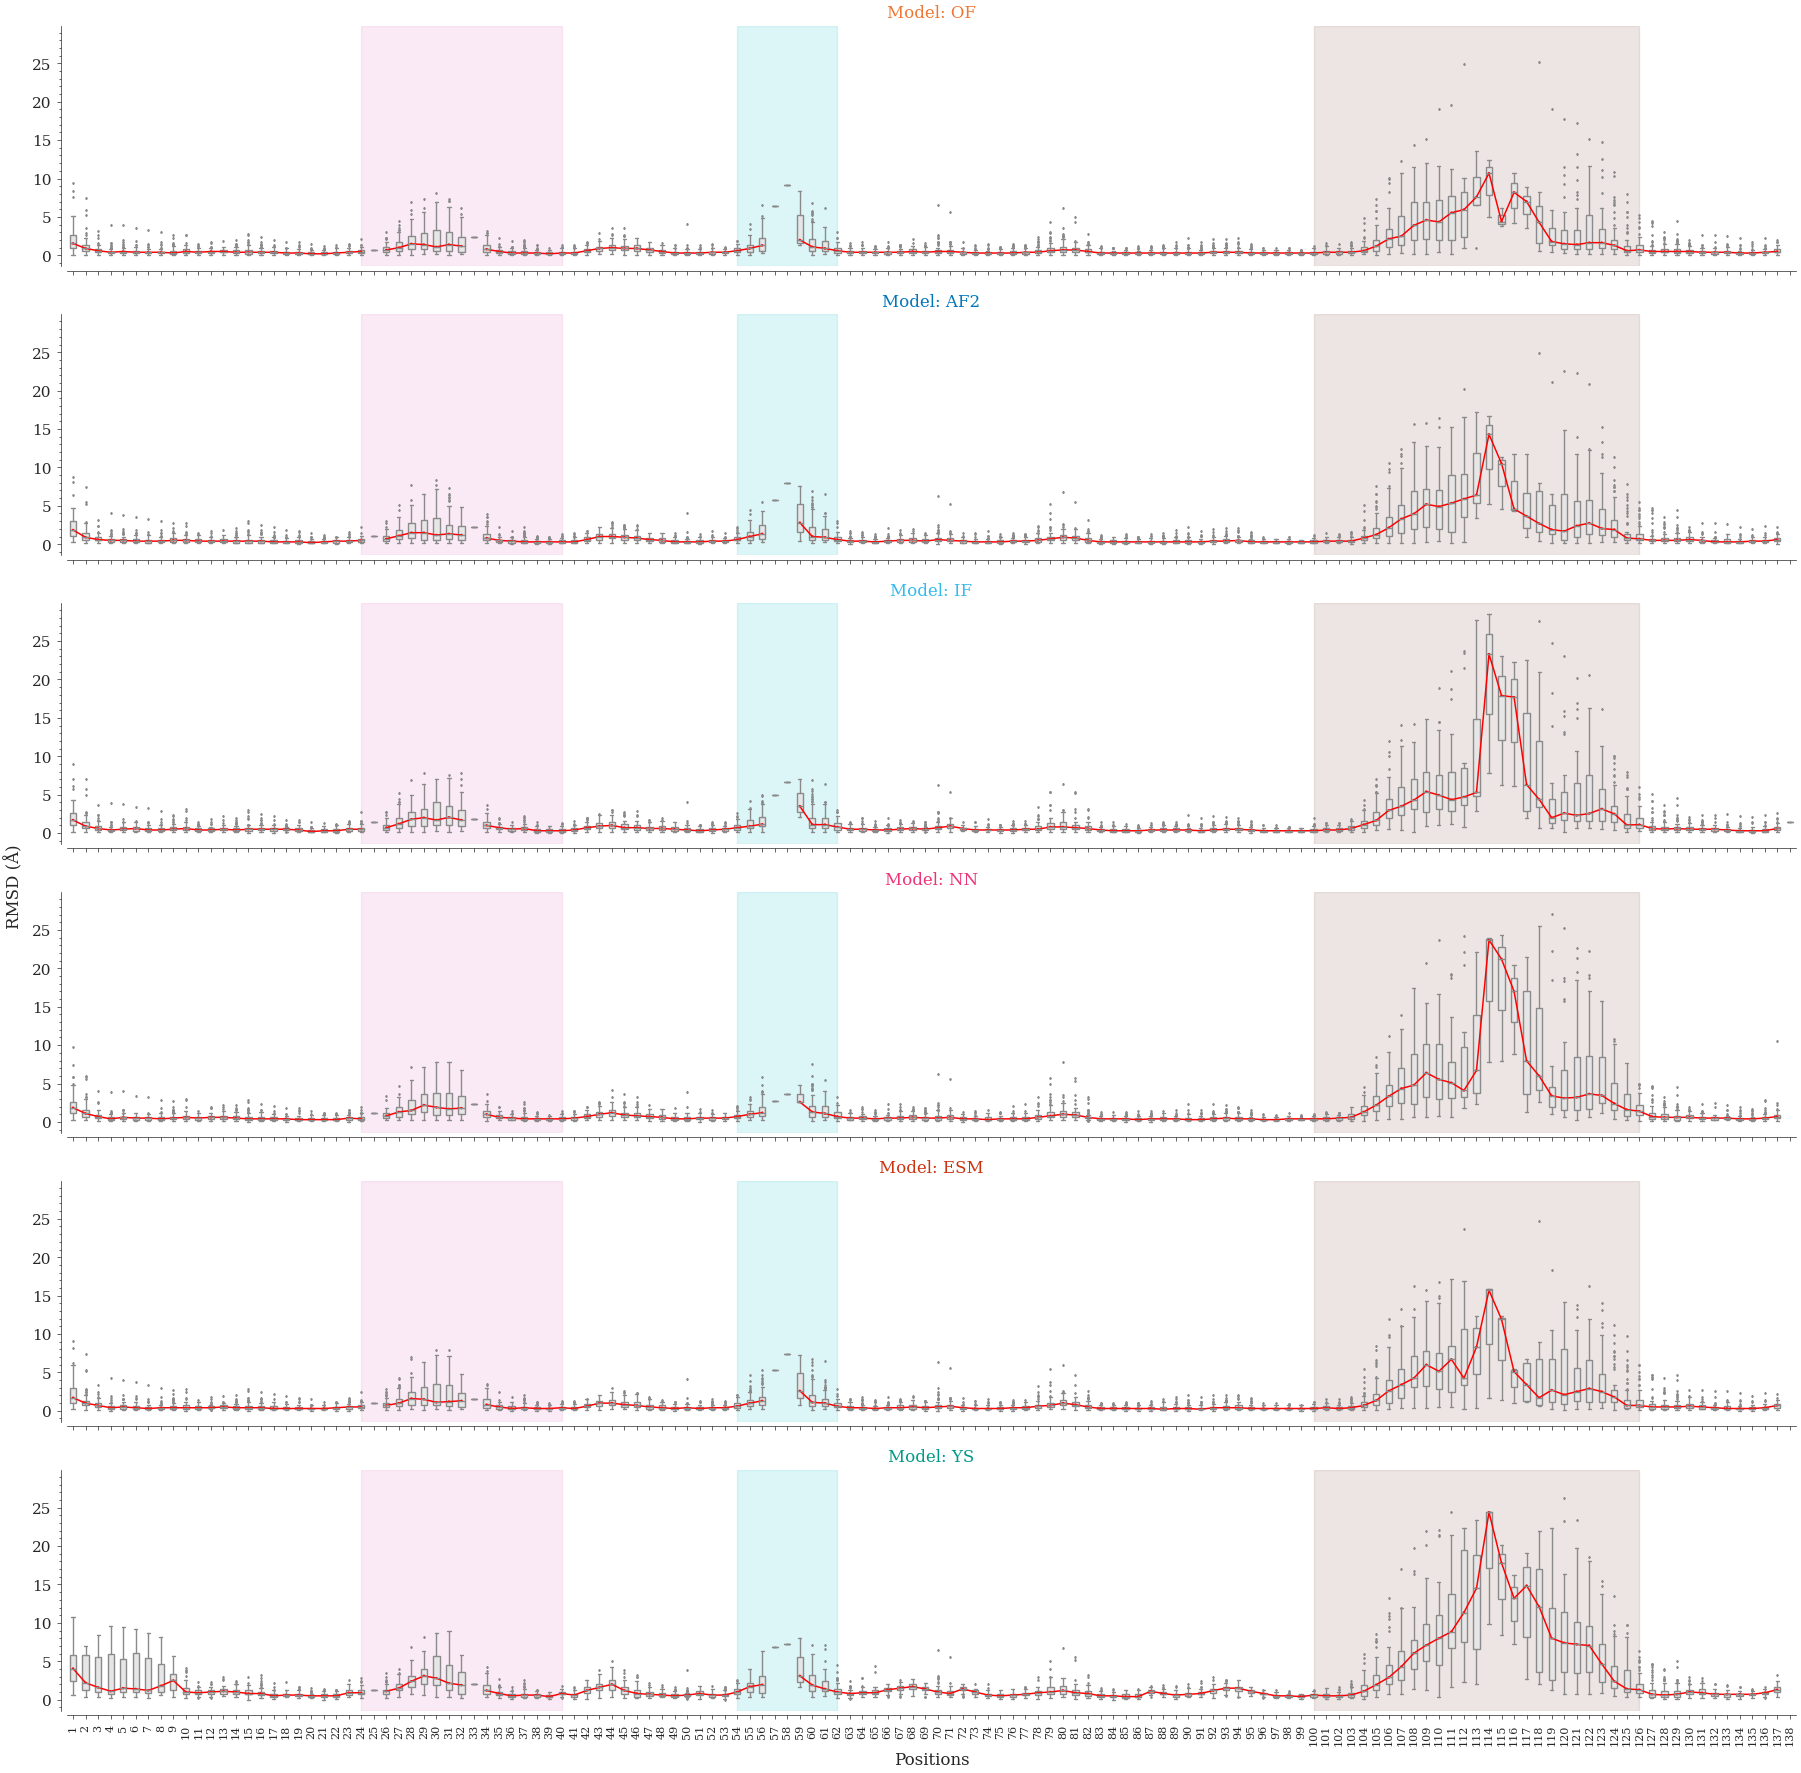

In [18]:
dff = rmsd_by_pos[
	        (rmsd_by_pos['rmsd atoms'] == 'ca') &
	        (rmsd_by_pos['model'].isin(['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS']))
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'rmsd atoms'])]

f = sns.catplot(
    data=dff, row="model",
    kind="box", height=3, aspect=6,
	row_order=['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'],
	color='#E6E6E6',
	width=0.5, fliersize=1
)

for i, y in enumerate([ofm,afm,ifm, nnm, esmm, ysm]):

	ax = sns.pointplot(x=list(range(1, 139)), y=y, ax=f.axes[i][0], scale=0.6, color='red')
	ax.axvspan(23, 39, alpha=0.15, color='#E377C2', zorder=0)
	ax.axvspan(53, 61, alpha=0.15, color='#17BECF', zorder=0)
	ax.axvspan(99, 125, alpha=0.15, color='#8C564B', zorder=0)

	plt.setp(ax.collections, sizes=[1])

# set labels
f.figure.axes[-1].set_xlabel('Positions')
f.figure.text(-0.005, 0.5, 'RMSD (Å)', va='center', rotation='vertical')

# disable minor ticks

for i in [0,1,2,3,4,5]:
    f.figure.axes[i].tick_params(axis='x', which='minor', bottom=False)
    
# change title color according to the model
for i,j,k in zip([0,1,2,3,4,5],
                 ['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'],
                 ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988']):
    f.figure.axes[i].set_title(f'Model: {j}', c=f'{k}')
    
# set new positions for axes
for i in [0,1,2,3,4,5]:
    f.figure.axes[i].spines['left'].set_position(('data', -1))
    f.figure.axes[i].spines['bottom'].set_position(('data', -2))
    
plt.xticks(rotation=90, fontsize=8)
loc = ticker.MaxNLocator(2) # this locator puts ticks at regular intervals

plt.tight_layout()

plt.savefig('figures/figure4.png', dpi=300, format='png', bbox_inches="tight", facecolor='white', edgecolor=None)
plt.savefig('figures/figure4.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 4.** Distribution of Cα RMSD values by position for the OmegaFold, AlphaFold2, IgFold, Nanonet, ESMFold, and Yang-Server. CDR1, CDR2, and CDR3 regions are colored pink, cyan, and brown, respectively. The RMSD distributions are represented by a boxplot. The lower and upper edges of the box represent the first (Q1) and third quartile (Q3), respectively. The difference Q3 - Q1 is known as the interquartile range (IQR). Whiskers extend to the minimum and maximum points within ±1.5 × IQR, respectively. The red line indicates the median value by position.

## Figure S3

In [19]:
afm = []
af_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'AF2') & (rmsd_by_pos['rmsd atoms'] == 'all')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])
        ]
for i in af_df:
    afm.append(af_df[i].median() if sum(af_df[i].isnull()) <= 72 else np.nan)

nnm = []
nn_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'NN') & (rmsd_by_pos['rmsd atoms'] == 'all')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(nn_df, start=1):
    nnm.append(nn_df[i].median() if sum(nn_df[i].isnull()) <= 72 else np.nan)

ofm = []
of_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'OF') & (rmsd_by_pos['rmsd atoms'] == 'all')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(of_df, start=1):
    ofm.append(of_df[i].median() if sum(of_df[i].isnull()) <= 72 else np.nan)

ifm = []
if_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'IF') & (rmsd_by_pos['rmsd atoms'] == 'all')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(if_df, start=1):
    ifm.append(if_df[i].median() if sum(if_df[i].isnull()) <= 72 else np.nan)
esmm = []
esm_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'ESM') & (rmsd_by_pos['rmsd atoms'] == 'all')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(esm_df, start=1):
    esmm.append(esm_df[i].median() if sum(esm_df[i].isnull()) <= 72 else np.nan)
ysm = []
ys_df = rmsd_by_pos[
	        (rmsd_by_pos['model'] == 'YS') & (rmsd_by_pos['rmsd atoms'] == 'all')
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'model', 'rmsd atoms'])]
for c, i in enumerate(ys_df, start=1):
    ysm.append(ys_df[i].median() if sum(ys_df[i].isnull()) <= 72 else np.nan)


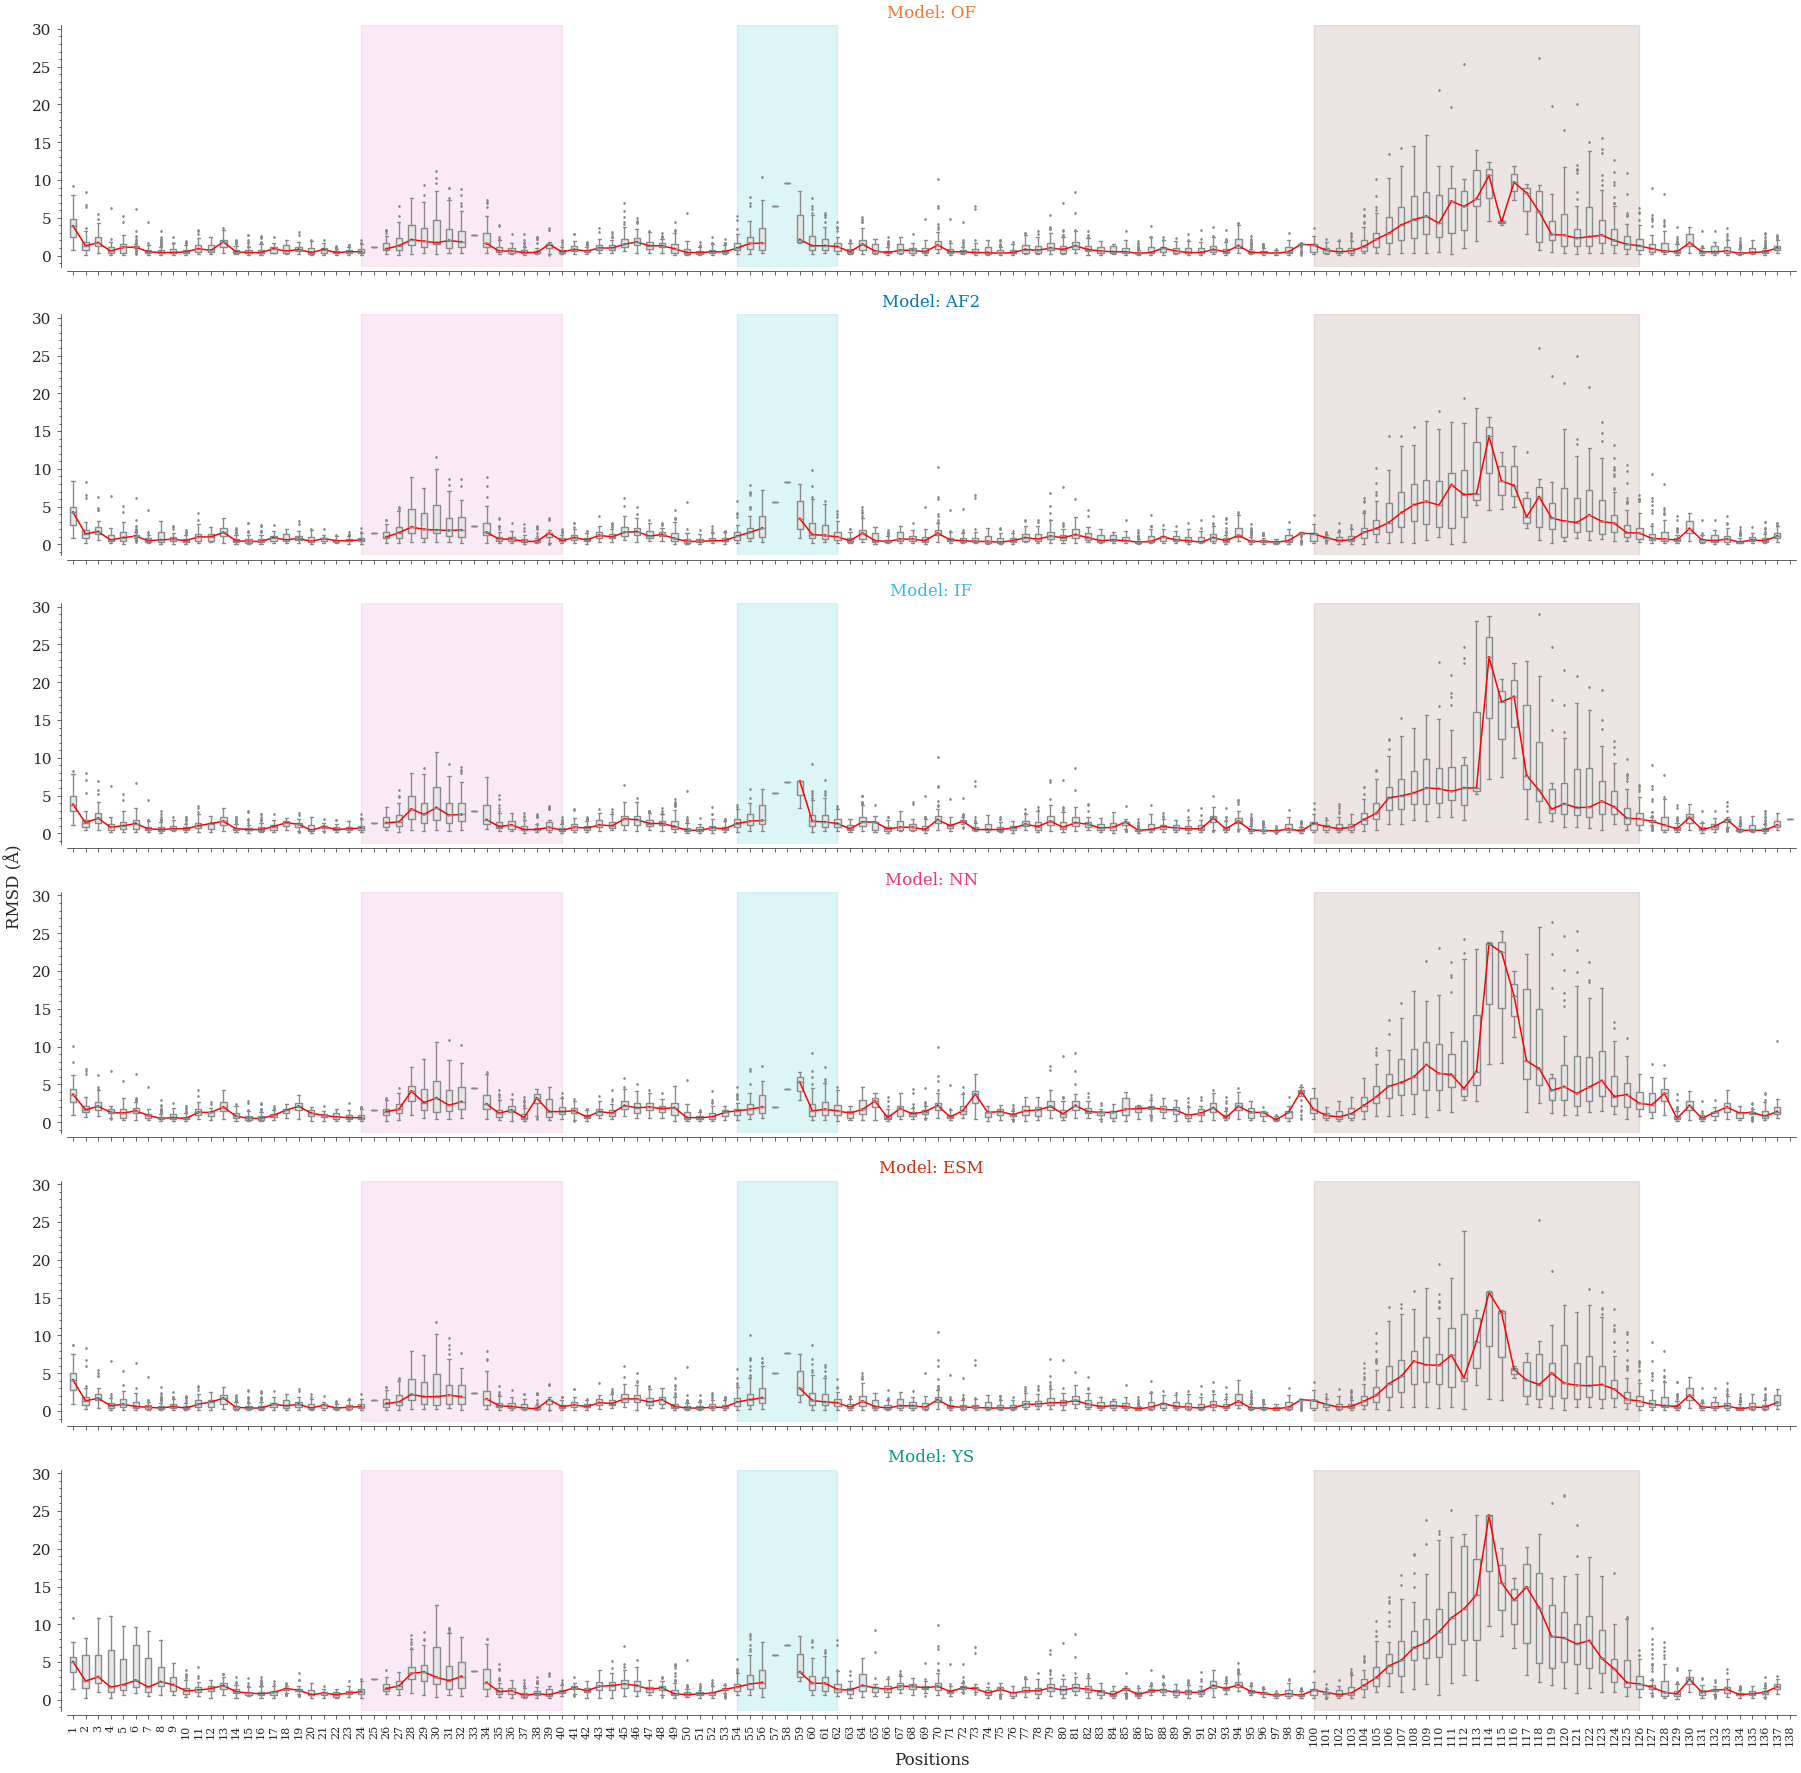

In [20]:
dff = rmsd_by_pos[
	        (rmsd_by_pos['rmsd atoms'] == 'all') &
	        (rmsd_by_pos['model'].isin(['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS']))
        ].loc[:, ~rmsd_by_pos.columns.isin(['PDB', 'rmsd atoms'])]

f = sns.catplot(
    data=dff, row="model",
    kind="box", height=3, aspect=6,
	row_order=['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'],
	color='#E6E6E6',
	width=0.5, fliersize=1
)
l = plt.xticks(rotation=90, fontsize=9)
loc = ticker.MaxNLocator(2) # this locator puts ticks at regular intervals

for i, y in enumerate([ofm,afm,ifm, nnm, esmm, ysm]):
	ax = sns.pointplot(x=list(range(1, 139)), y=y, ax=f.axes[i][0], scale=0.6, color='red')
	ax.axvspan(23, 39, alpha=0.15, color='#E377C2', zorder=0)
	ax.axvspan(53, 61, alpha=0.15, color='#17BECF', zorder=0)
	ax.axvspan(99, 125, alpha=0.15, color='#8C564B', zorder=0)
	plt.setp(ax.collections, sizes=[1])

# set labels
f.figure.axes[-1].set_xlabel('Positions')
f.figure.text(-0.005, 0.5, 'RMSD (Å)', va='center', rotation='vertical')

# disable minor ticks
for i in [0,1,2,3,4,5]:
    f.figure.axes[i].tick_params(axis='x', which='minor', bottom=False)
    
# change title color according to the model
for i,j,k in zip([0,1,2,3,4,5],
                 ['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'],
                 ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988']):
    f.figure.axes[i].set_title(f'Model: {j}', c=f'{k}')
    
# set new positions for axes
for i in [0,1,2,3,4,5]:
    f.figure.axes[i].spines['left'].set_position(('data', -1))
    f.figure.axes[i].spines['bottom'].set_position(('data', -2))
    
plt.xticks(rotation=90, fontsize=8)
loc = ticker.MaxNLocator(2) # this locator puts ticks at regular intervals

plt.tight_layout()
    
plt.savefig('figures/figureS3.png', dpi=300, format='png', bbox_inches="tight", facecolor='white', edgecolor=None)
plt.savefig('figures/figureS3.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S3.** Distribution of heavy atoms RMSD values by position for the OmegaFold, AlphaFold2, IgFold, and Nanonet models. CDR1, CDR2, and CDR3 regions are colored pink, cyan, and brown, respectively. The RMSD distributions are represented by a boxplot. The lower and upper edges of the box represent the first (Q1) and third quartile (Q3), respectively. The difference Q3 - Q1 is known as the interquartile range (IQR). Whiskers extend to the minimum and maximum points within ±1.5 × IQR, respectively. The red line indicates the median value by position.

## Figure S4

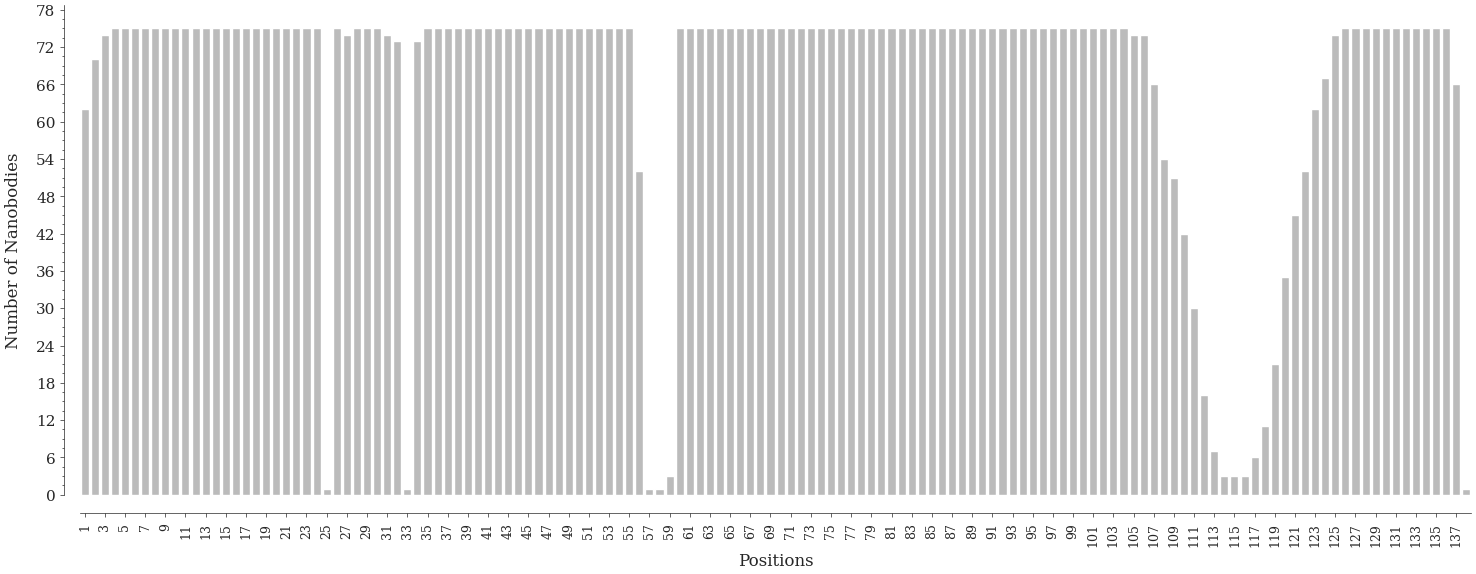

In [21]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(
	data=rmsd_by_pos[(rmsd_by_pos['model'] == 'IF') & 
                     (rmsd_by_pos['rmsd atoms'] == 'ca')].notnull().sum()[3:].reset_index(),
	x='index', y=0, color='#BBBBBB')

ax.set_xticks(ax.get_xticks()[::2])

# set labels
ax.set_xlabel('Positions')
ax.set_ylabel('Number of Nanobodies', labelpad=10)

# despine top and right
sns.despine(top=True, right=True)

# set new positions for axes
ax.spines['left'].set_position(('data', -2))
ax.spines['bottom'].set_position(('data', -3))

# disable x minor ticks
ax.tick_params(axis='x', which='minor', bottom=False)

# rotate xticks
l = plt.xticks(rotation=90, fontsize=9)
loc = ticker.MaxNLocator(15) # this locator puts ticks at regular intervals

ax.yaxis.set_major_locator(loc)

plt.tight_layout()

plt.savefig('figures/figureS4.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS4.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S4.** Representation by positions of the Nbs in the dataset using the Aho numbering scheme.

## Figure 5

In [22]:
cl = []
for p in rmsd_by_region['PDB']:
	cl.append(models_df[models_df['model'] == 'AF2']['CDR3 length'].loc[p])
rmsd_by_region_cdr3 = rmsd_by_region.copy()
rmsd_by_region_cdr3['CDR3 length'] = cl
rmsd_cdr3 = rmsd_by_region_cdr3[
	(rmsd_by_region_cdr3['Fragment'] == 'CDR3') &
	(rmsd_by_region_cdr3['rmsd atoms'] == 'ca') &
	(rmsd_by_region_cdr3['model'].isin(['AF2', 'IF', 'OF', 'NN', 'ESM', 'YS']))
]
cdr3_count = rmsd_cdr3[rmsd_cdr3['model'] == 'AF2']['CDR3 length'].value_counts().sort_index()

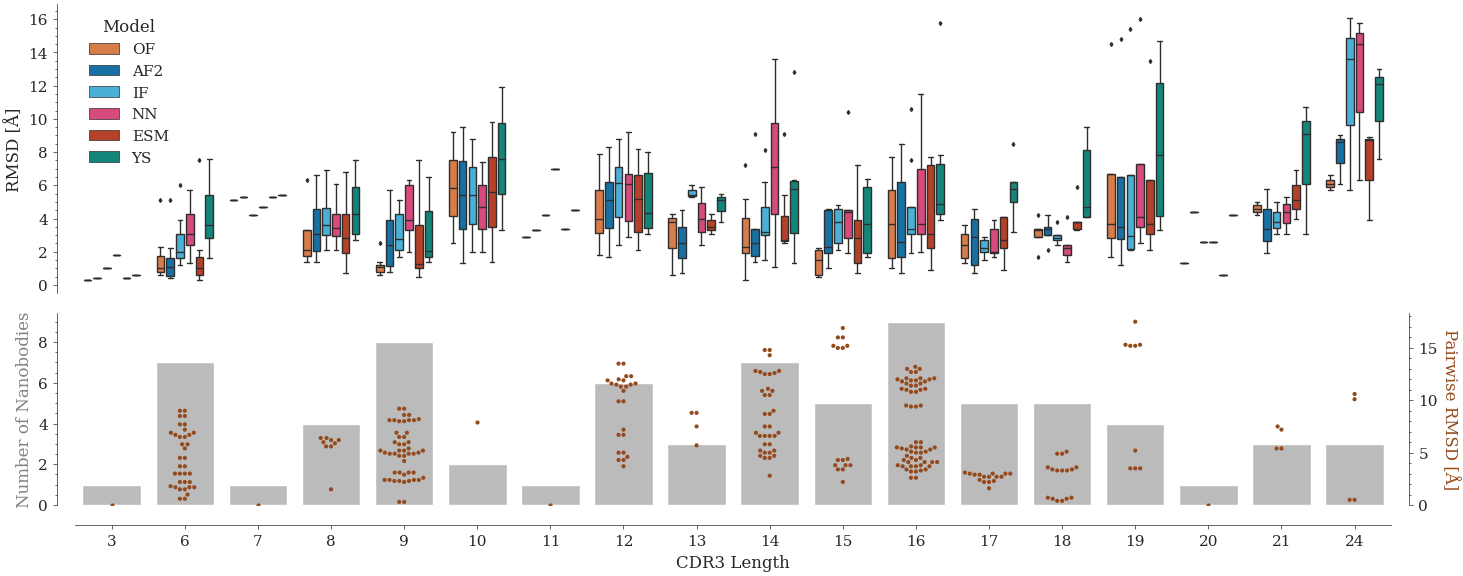

In [23]:
cdr3_rmsd_dist = pd.read_csv('csv_data/cdr3_rmsd_distrib.csv', index_col=0)

fig, axs = plt.subplots(2, sharex=True, figsize=(15, 6), gridspec_kw={'height_ratios': [0.6, 0.4]})
# plt.figure(figsize=(18, 6))

ax0 = sns.boxplot(data=rmsd_cdr3.sort_values('CDR3 length'), x='CDR3 length', y='RMSD', hue='model',
                  hue_order=['OF', 'AF2', 'IF', 'NN', 'ESM', 'YS'], 
                  palette=['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988'],
                  ax=axs[0], fliersize=2)

adjust_box_widths(ax0.figure, 0.8)

# change legend title
ax0.legend(title='Model')

# despine top, bottom and right
sns.despine(ax=ax0, top=True, right=True, bottom=True)

# disable x axis
ax0.get_xaxis().set_visible(False)

ax1 = sns.barplot(x=cdr3_count.index, y=cdr3_count, ax=axs[1], color='#BBBBBB')

ax2 = plt.twinx(ax=ax1)

ax3 = sns.swarmplot(data=cdr3_rmsd_dist.sort_values('CDR3 length'), x='CDR3 length', y='RMSD', 
                    color='#944A1C', ax=ax2, size=3)

# set labels
ax0.set_ylabel('RMSD [Å]')
ax1.set_ylabel('Number of Nanobodies', color='#828282')
ax1.set_xlabel('CDR3 Length')
ax3.set_ylabel('Pairwise RMSD [Å]', color='#944A1C', rotation=270, labelpad=15)

# disable spines
sns.despine(ax=ax1, top=True, right=True)
sns.despine(ax=ax2, top=True, right=False, left=True, bottom=True)

# set new positions for axes
ax0.spines['left'].set_position(('data', -0.75))
ax1.spines['left'].set_position(('data', -0.75))
ax2.spines['right'].set_position(('data', 17.75))
ax1.spines['bottom'].set_position(('data', -1))

# set ylim
ax2.set_ylim(0)

# disable x minor ticks
ax1.tick_params(axis='x', which='minor', bottom=False)

plt.tight_layout()

plt.savefig('figures/figure5.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figure5.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 5.** RMSD distributions per CDR3 length. The upper panel shows the RMSD distribution per CDR3 length for OmegaFold, AlphaFold2, IgFold, Nanonet, ESMFold, and Yang-Server. The RMSD distributions are represented by a boxplot. The lower and upper edges of the box represent the first (Q1) and third quartile (Q3), respectively. The difference Q3 - Q1 is known as the interquartile range (IQR). Whiskers extend to the minimum and maximum points within ±1.5 × IQR, respectively. The lower panel shows the number of Nbs in the dataset per CDR3 length (bars in grey) and the pairwise RMSD values among CDR3s of the same length (swarm plot in brown).

## Figure S5

In [24]:
cdr3_length_dict = {'1BZQ_2': 'GGYELR------------------DRTYGQ',
                    '1F2X_1': 'STVASTGWC-----------SRLRPYDYHY',
                    '1G9E_1': 'GEGG----------------------TWDS',
                    '1HCV_1': 'GEGG----------------------TWDS',
                    '1I3V_1': 'KTTTWGG---------------NDPNNWNY',
                    '1IEH_1': 'YSGG----------------------ALDA',
                    '1JTO_1': 'DSTIYASYYECG------HGLSTGGYGYDS',
                    '1KXQ_2': 'GNSVRLA----------------SWEGYFY',
                    '1KXT_2': 'GPGSGKLVV-----------AGRTCYGPNY',
                    '1KXV_2': 'SLRYGL-----------------PGCPIIP',
                    '1MVF_1': 'SSRWMDYS-------------ALTAKAYNS',
                    '1OAU_1': 'MWYYG-------------------TYYFDY',
                    '1OAU_2': 'WYS-----------------------NHLV',
                    '1OHQ_1': 'ALEPL-------------------SEPLGF',
                    '1OL0_1': 'EPRIPR------------------PPSFDY',
                    '1OP9_1': 'TEVAGWP---------------LDIGIYDY',
                    '1QD0_1': 'RPVRVADI--------------SLPVGFDY',
                    '1RI8_1': 'GWSSLGSC-------------GTNRNRYNY',
                    '1RJC_1': 'DTSTWYRGY-----------CGTNPNYFSY',
                    '1SHM_1': 'GRIGRSVFN------------LRRESWVTW',
                    '1SJV_1': 'HYF------------------------RSY',
                    '1SJX_1': 'EDRHR-------------------IGTVGY',
                    '1T2J_1': 'DWY-----------------------GMDV',
                    '1U0Q_1': 'RMPYSGDY--------------RSSGTYDY',
                    '1VHP_1': 'LKKY----------------------AFDY',
                    '1XFP_1': 'DSTIYASYYECG------HGLSTGGYGYDS',
                    '1YC7_1': 'QCGVR--------------------SIREY',
                    '1YC8_1': 'QCGVR--------------------SIREY',
                    '1ZMY_1': 'DSTIYASYYECG------HGLSTGGYGYDS',
                    '1ZV5_2': 'GYRNYG------------------QCATRY',
                    '1ZVH_2': 'ARQGWYIP--------------LNSYGYNY',
                    '1ZVY_1': 'TRKYVPVRF------------ALDQSSYDY',
                    '2BSE_2': 'RSGGFSS----------------NRELYDG',
                    '2P4A_2': 'GGDALV------------------ATRYGR',
                    '2P44_2': 'GGYELR------------------DRTYGQ',
                    '2P45_2': 'GGYELR------------------DRTYGQ',
                    '2VYR_2': 'PWYPFMA---------------SKGSEFDY',
                    '2X1O_1': 'GAGWAG-----------------TMTDYNY',
                    '2X1P_1': 'DLHRPYGPG------------TQRSDEYDS',
                    '2X1Q_1': 'SSRVFYTEV------------LQTTTGYDY',
                    '2X6M_1': 'KFSPGYCG--------------GSWSNFGY',
                    '2X89_1': 'DIPLRCRDI-----------VAKGGDGFRY',
                    '2XA3_1': 'KWRPLRYSD------------NPSNSDYNY',
                    '2XT1_2': 'SG--------------------------SS',
                    '3B9V_1': 'WGGDG-------------------FYAMDY',
                    '3CFI_3': 'WLGG---------------------RDWYD',
                    '3DWT_1': 'VRGYFMRL--------------PSSHNFRY',
                    '3EAK_1': 'VRGYFMRL--------------PSSHNFRY',
                    '3EBA_1': 'TEVAGWP---------------LDIGIYDY',
                    '3EZJ_2': 'NVKTWA------------------GMTRDY',
                    '3G9A_2': 'DSGTQLGYVGA-------VGLSCLDYVMDY',
                    '3JBC_5': 'GQGCLTTIQ-----------ALGGAYGYNA',
                    '3JBD_5': 'TSISC-------------------SSGYMF',
                    '3JBE_5': 'GRWRFGDI-------------CHEGSGYNY',
                    '3JBF_5': 'TWRWSCP---------------LDPEGYQY',
                    '3JBG_5': 'SNTCPG-----------------ASADFRS',
                    '3K1K_2': 'NVG------------------------FEY',
                    '3K3Q_1': 'DEDVTPRV-------------MGVIPHADH',
                    '3K7U_1': 'RPQGDY-----------------VTAHYDY',
                    '3K74_2': 'DWAT----------------------GLAK',
                    '3K80_1': 'DLYGLGS---------------HMENEYDS',
                    '3K81_2': 'NLQTGT-----------------LSGARLY',
                    '3LN9_1': 'GTRKNVW---------------TRQHPFDY',
                    '3P0G_2': 'KDYGAV------------------LYEYDY',
                    '3P9W_2': 'HYYGWHP----------------GYGLSYS',
                    '3QSK_2': 'GGHHLR------------------DHTYGQ',
                    '3QXT_1': 'DDNYVTA---------------SWRSGPDY',
                    '3QXV_1': 'DDNYVTA---------------SWRSGPDY',
                    '3QYC_1': 'LPDLCPGD--------------NCTYPDAS',
                    '3R0M_1': 'KWRPLRYSD------------YPSNSDYYD',
                    '3SN6_5': 'CPAPFTRDC-----------FDVTSTTYAY',
                    '3STB_1': 'DRFSPVVPG------------PIPVNTVDS',
                    '3TPK_1': 'APTATH------------------ALYFDY',
                    '3UPC_1': 'SYG-----------------------AFDY',
                    '3V0A_3': 'GYRTDT------------------RIPGGS',
                    '3ZHD_1': 'HAPST--------------------EAPDY',
                    '3ZHK_1': 'HAPST--------------------EAPDY',
                    '3ZHL_1': 'HAPST--------------------EAPDY',
                    '3ZKQ_2': 'A---------------------------GR',
                    '3ZKX_3': 'N---------------------------GH',
                    '4AQ1_2': 'SDKYNFD---------------TSHAGYGY',
                    '4B5E_1': 'REGDVGLVS------------YKRSSNYPY',
                    '4B41_1': 'ASLVR--------------------GPLDH',
                    '4B50_1': 'ESRTSWS----------------SPSPLDV',
                    '4C57_2': 'RGYSGD-----------------YRPINNP',
                    '4C58_2': 'TTDCAAF---------------VERATAIT',
                    '4CDG_2': 'VADYD-------------------MGFQSF',
                    '4DK3_1': 'DRFPTMEVV------------TIMTNEYDY',
                    '4EIG_2': 'NRGL---------------------AGPAY',
                    '4EIZ_2': 'DGSQYRSTY-----------SFRDKPDYGS',
                    '4FHB_2': 'PGRPHGSSWS----------LNKKGQGYDY',
                    '4GFT_2': 'RVVPVFS---------------DSTKGYVY',
                    '4GRW_3': 'VRTGWGLN--------------APDYAMDY',
                    '4GRW_4': 'DPECYRVR-------------GYYNGEYDY',
                    '4GRW_5': 'TSLFPTS----------------RGSHYDT',
                    '4HEM_2': 'GDNYYYT----------------RTYEYDY',
                    '4HEP_2': 'GRFVTFGSAWS--------FVGGGPYGIDY',
                    '4HJJ_2': 'RGIR---------------------SAMDY',
                    '4HJJ_3': 'DYN-----------------------SPWT',
                    '4I0C_2': 'KTGAFSYGS-----------LWWMSRAYNH',
                    '4I1N_2': 'SRISYAVWN------------TIPYNKLTL',
                    '4I13_2': 'SRISYRVWN------------TIPYNKLTL',
                    '4IDL_1': 'DGRRFDG---------------ARWREYES',
                    '4IOS_2': 'TLDWGKT----------------LSDEYDY',
                    '4JVP_1': 'DKGLCSWLR------------AGGKVTFGS',
                    '4KFZ_2': 'GLTESLE---------------LTADWFDY',
                    '4KML_2': 'GLGIYII---------------RARGGYDH',
                    '4KRL_1': 'AAGSAWY---------------GTLYEYDY',
                    '4KRN_1': 'TYLSSDYSRY---------ALPQRPLDYDY',
                    '4KRO_4': 'ALTYY-------------------DYEFAY',
                    '4KRO_3': 'NNN-----------------------WPTT',
                    '4KRP_2': 'GYQINSGNY------------NFKDYEYDY',
                    '4KSD_2': 'RLTL---------------------GQFDY',
                    '4LAJ_3': 'DCTVDPS----------------LLYVMDY',
                    '4LDE_2': 'KDFGAI------------------IYDYDY',
                    '4LGP_2': 'GCYS----------------------WRGP',
                    '4LGR_2': 'DEAGI-------------------GGFNDY',
                    '4LGS_2': 'STVFAEITGL----------AGYQSGSYDY',
                    '4LHJ_2': 'TFGSRW-----------------PYAHSDH',
                    '4LHQ_2': 'SSVYAEMPYA----------DSVKATSYNY',
                    '4M3J_1': 'FMSTNS------------------GRTGSF',
                    '4MQT_2': 'WTLF---------------------HSDEY',
                    '4N1H_2': 'TTYASLSDT------------YIGEHIYDD',
                    '4N9O_2': 'GLGIYII---------------RARGGYDH',
                    '4NBX_2': 'APYGANW----------------YRDEYAY',
                    '4NBZ_2': 'NSQRTRL---------------QDPNEYDY',
                    '4NC2_2': 'GLGWDSR----------------YSQSYNY',
                    '4OCL_3': 'GTYYGT-----------------LSYKYDF',
                    '4ORZ_3': 'RVGS----------------------EYDL',
                    '4P2C_3': 'NIEAGTY----------------YGPGRDY',
                    '4PFE_1': 'NVG------------------------FEY',
                    '4PGJ_1': 'YTSPPQ------------------NHGFDY',
                    '4PIR_2': 'DARTI-------------------TGRADY',
                    '4POU_2': 'GGYQLR------------------DRTYGH',
                    '4POY_1': 'GGYQLR------------------DRTYGH',
                    '4PPT_1': 'GGYELR------------------DRTYGH',
                    '4QGY_1': 'VNAQGIYCTD----------YIIGPYGMDY',
                    '4QLR_1': 'DKYYTGP---------------GGESVYDY',
                    '4QO1_1': 'HPQRGWG----------------STLGWTY',
                    '4S10_1': 'DLHRPYGPG------------SQRTDDYDT',
                    '4TVS_2': 'TFTPDGSWY------------YTRGSSYDY',
                    '4TYU_1': 'DLKMQVAA-------------YMNQRSVDY',
                    '4U05_1': 'DLKMQVAA-------------YMNQRSVDY',
                    '4W2O_1': 'RNWGG--------------------GLDVY',
                    '4W2P_1': 'DPYGM--------------------ESLRY',
                    '4W6W_2': 'GPFVYGRG-------------CLGQAFYSY',
                    '4W6X_2': 'SSNSVCPP--------------GHVAWYND',
                    '4W6Y_2': 'VREATYSDNR----------CSVRSYTYDY',
                    '4W68_1': 'DLKMQVAA-------------YMNQRSVDY',
                    '4WEM_2': 'SHWGTL-----------------LIKGIEH',
                    '4WEN_2': 'TDWGTL-----------------LIKGIDH',
                    '4WEU_1': 'QKSLNV------------------PAPWDY',
                    '4WGV_2': 'AIRTTV-----------------RTSAQEY',
                    '4X7C_2': 'EDYSAY------------------APPSGS',
                    '4X7F_2': 'GI-------------------------SNP',
                    '4XT1_3': 'EETIV--------------------EEADY',
                    '4YGA_2': 'TREFCSA----------------YVFLYEH',
                    '4Z9K_2': 'RPCFLGV----------------PLIDFGS',
                    '4ZG1_1': 'RVGI---------------------TMLAH',
                    '5BOP_1': 'RRWLGGSY--------------FDPGNYDF',
                    '5BOZ_2': 'NKFVRGLV-------------AVRAIDYDY',
                    '5C1M_2': 'RAPVGQS---------------SSPYDYDY',
                    '5C2U_1': 'DRRQRWGPY-----------YYLSALEYVY',
                    '5C3L_4': 'Q---------------------------YG',
                    '5DA0_2': 'GDTAIT-----------------SWYGYDY',
                    '5DA4_1': 'GDTAIT-----------------SWYGYDY',
                    '5DFZ_4': 'ETR-----------------------GFMH',
                    '5DMJ_2': 'LPF-----------------------TFDD',
                    '5DXW_1': 'PR-------------------------YDS',
                    '5E0Q_1': 'SNRGSLYT-------------LDNQNRYED',
                    '5E1H_2': 'SSIYSDISGA----------ATVWATSYNY',
                    '5E03_1': 'GL--------------------------TN',
                    '5E7B_1': 'ATTTVASP-------------PVRHVCNGY',
                    '5EUL_4': 'QRTV---------------------MSQPY',
                    '5F1K_2': 'GRGIVAG---------------RIPAEYAD',
                    '5F1O_2': 'RYQPRYYDS-----------GDMDGYEYDN',
                    '5F7K_2': 'LPN------------------------YRS',
                    '5F7L_2': 'YSDRLTD---------------CSNCEADY',
                    '5F21_2': 'ASPA---------------------VGADT',
                    '5FOJ_1': 'ADAIGLAEYWS--------TPTLSAARYKY',
                    '5FUC_3': 'RPSIRCAS--------------FSATEYKD',
                    '5FV2_1': 'DPR-----------------------KLDY',
                    '5FWO_1': 'GFAGYGSFTS---------RSARDSDKYDY',
                    '5G5R_2': 'GWGA---------------------TPRSY',
                    '5GXB_2': 'AARPSYSGDY----------GYTEALRYDY',
                    '5H8D_1': 'G---------------------------GF',
                    '5HDO_1': 'DHPGLCTSE------------SGRRRYLEV',
                    '5HM1_1': 'PMIYYG------------------GRYSDY',
                    '5HVF_2': 'WGQDGW------------------LGQYDY',
                    '5HVG_2': 'DPRPWGY----------------DVTDYDY',
                    '5I0Z_1': 'GAYKR-------------------GYAMDY',
                    '5IMK_1': 'GRWDKYGS--------------SFQDEYDY',
                    '5IP4_1': 'EN--------------------------YY',
                    '5IVN_1': 'ARGCKR-----------------GRYEYDF',
                    '5J1S_3': 'RRNPING----------------PYYTTAY',
                    '5J56_2': 'RLGGWAS---------------FSPQEYDY',
                    '5J57_2': 'DLEYSQIM-------------PSCRGSYGV',
                    '5JA8_2': 'DFACPL------------------IREYDY',
                    '5JA9_2': 'RLSL----------------------ISDS',
                    '5JDS_1': 'DSFEDPTCT-----------LVTSSGAFQY',
                    '5JMO_2': 'GMYA----------------------APPW',
                    '5JQH_2': 'KVAGT-------------------FSIYDY',
                    '5KTZ_4': 'GFGLSL-----------------SRYTYAY',
                    '5KU0_4': 'GFGLSL-----------------SRYTYAY',
                    '5KU2_4': 'GFGLSL-----------------SRYTYAH',
                    '5KWL_4': 'GFGLSL-----------------SRYTYAY',
                    '5L21_2': 'G---------------------------EF',
                    '5LHN_2': 'EWVPPGYGATVQ------ALCNNAGYGMEY',
                    '5LHR_2': 'DLASSR------------------DVSSWY',
                    '5LMJ_1': 'GAVTYYS----------------ARYEYDY',
                    '5LMW_1': 'DRFLTR------------------SVKYDY',
                    '5LWF_2': 'TPYYRGSY--------------YAASTYTY',
                    '5LZ0_1': 'TPYGSRYY-------------LRELREYDY',
                    '5M2I_2': 'SILPLSD----------------DPGWNTY',
                    '5M2J_2': 'SPS------------------------GFN',
                    '5M2M_2': 'RDGIPTS---------------RSVESYNY',
                    '5M2W_1': 'FFRRD-------------------YVGYDY',
                    '5M7Q_1': 'DSRPIY------------------SGTWRY',
                    '5M13_2': 'AEWGSQSP--------------LTQWFYRY',
                    '5M14_2': 'AEWGSQSP--------------LTQWFYRY',
                    '5M15_2': 'AYWGKQSP--------------LISWDYSY',
                    '5MJE_2': 'ESRRPL------------------GSRNTY',
                    '5MP2_2': 'SVRTTIQP--------------FKGNYYNY',
                    '5MWN_3': 'RIWRG-------------------TVYDNI',
                    '5MY6_2': 'CYN-----------------------LETY',
                    '5N88_1': 'GGWALGDEI------------PSSFLEFDY',
                    '5NBD_2': 'GYVVDFL----------------DLAEYDS',
                    '5NBL_3': 'RNPRATA---------------EDVSAYDY',
                    '5NLU_1': 'LGATT--------------------MSNAV',
                    '5NM0_1': 'LGATT--------------------MSNAV',
                    '5NQW_2': 'DEEYAL-----------------GPNEFDY',
                    '5O0W_2': 'DTTDRYDSANGR------YYCTISSDTYDY',
                    '5O02_2': 'RRDYGDS---------------WFTAGGGY',
                    '5O2U_2': 'ALD------------------------TAY',
                    '5O03_2': 'DLSSLTTVQAMCV----IPRPGFSAKAYDY',
                    '5O04_2': 'RRA-----------------------SADY',
                    '5O04_3': 'EDYSAY------------------APPSGS',
                    '5O05_1': 'IRYSPI------------------HAPLDY',
                    '5O8F_2': 'KGRYSGGL--------------YYPTNYDY',
                    '5O8F_3': 'KGRYSGGL--------------YYPTNYDY',
                    '5OCL_1': 'LPR-----------------------FSHL',
                    '5OCL_2': 'NPNPSGS---------------SVYRRNDY',
                    '5OMM_2': 'TIVVF-------------------TTPMHY',
                    '5OMN_2': 'RT-------------------------LGS',
                    '5OVW_2': 'AHRIFGGCL------------VIHSSGYVS',
                    '5SV3_1': 'IANPVYAT-------------SRNSDDYGH',
                    '5TD8_5': 'RYYSGTYSS------------TYDRDDYDY',
                    '5TJW_2': 'SLGYSGA----------------YASGYDY',
                    '5TOJ_2': 'IRSSSWGG--------------CVHYGMDY',
                    '5TOK_2': 'VAVAHFRG--------------CGVDGMDY',
                    '5TSJ_1': 'RDSS---------------------FGFDY',
                    '5U4L_2': 'RLGGWAS---------------FSPQEYDY',
                    '5U4M_2': 'RLGGWAS---------------FSPQEYDY',
                    '5U64_1': 'DVNRGGFC-------------YIEDWYFSY',
                    '5U65_1': 'STRVWGGYC-----------GGLDDATNND',
                    '5UK4_2': 'TKAYNGGE--------------TSGRGFYY',
                    '5UKB_1': 'FDSTGSP---------------IVRDNYEY',
                    '5USF_2': 'GLNR---------------------YAYDS',
                    '5VAK_2': 'RRINEVL---------------TTAPDYDF',
                    '5VL2_1': 'RASMAVS---------------TSPRVYPI',
                    '5VLV_1': 'RASMQVL---------------TSPRVYPI',
                    '5VM4_1': 'ALRRPGSDAS----------DYTRIPDYPY',
                    '5VNV_1': 'LETRS--------------------YSFRY',
                    '5VXJ_2': 'GIFDG--------------------NYRTY',
                    '5VXK_1': 'DRYTSVRQM-----------CTMIEGLHRV',
                    '5VXL_2': 'NLR-----------------------TNNY',
                    '5VXM_2': 'KSVWFCSV--------------IRSHEFNS',
                    '5WB2_3': 'DLSTFYGGNY----------YCGDRGIYDY',
                    '5WHZ_1': 'GRE-----------------------SPWT',
                    '5WHZ_2': 'TGKYYDFWSG----------YPPGEEYFQD',
                    '5WTS_1': 'NVG------------------------FEY',
                    '6APO_1': 'GWGI---------------------ASMRY',
                    '6B20_3': 'GRS------------------------RGY',
                    '6C5W_2': 'RLYPI--------------------LGHTY',
                    '6C9W_2': 'QGTNGGGY--------------SEATSYNY',
                    '6CK8_1': 'SLYRDPLG--------------VAGGMGVY',
                    '6CNW_1': 'DWGG----------------------PEPT',
                    '6CWG_2': 'STTYCSATT------------YSSDRLYDF',
                    '6DBA_1': 'HRFCNTW----------------SLGTLNV',
                    '6DBD_1': 'LSSG---------------------VNPWA',
                    '6DBE_1': 'DDLM---------------------IDRDY',
                    '6DO1_2': 'VAYPDIPTY------------FDYDSDNFY',
                    '6DYX_1': 'PKGH---------------------TGDHY',
                    '6EHG_3': 'GTGWSPQ----------------TDNEYNY',
                    '6EQI_2': 'SITGYGLV--------------DSASHYTI',
                    '6EY6_2': 'GFAGYGSFTS---------RSARDSDKYDY',
                    '6EZW_1': 'DLQYGSSWP------------QRSSAEYDY',
                    '6F2G_2': 'KNGGAAS---------------NYPNDYVY',
                    '6FE4_2': 'GEGG----------------------NRNY',
                    '6FPV_1': 'NVRLREY----------------RTTSYHY',
                    '6FUZ_2': 'DMS------------------------GTY',
                    '6FYS_1': 'TTAGGGLCWD----------GTTFSRLASS',
                    '6FYU_3': 'QGQWRAAP-------------VAVAAEYEF',
                    '6GCI_2': 'RDDGRMY---------------QGFYDFEY',
                    '6GJQ_2': 'TVVVSR-----------------YGLTYDY',
                    '6GJS_2': 'EITEQSR---------------PFYLTDDY',
                    '6GJS_3': 'AVQVR--------------------DYRNY',
                    '6GJU_3': 'DVRTRW------------------YASNNY',
                    '6GK4_3': 'NWGR---------------------TSVNS',
                    '6GKD_3': 'SSTYYYT----------------DPEKYDY',
                    '6GS1_2': 'KQYGSRAD--------------YPWDDYDY',
                    '6GWN_2': 'VRL-----------------------PQRY',
                    '6GWN_3': 'VWARVC------------------RNPYDY',
                    '6H02_2': 'CAYGTCY---------------YGDRAYEY',
                    '6H6Y_2': 'RRLA----------------------TYDY',
                    '6H6Z_2': 'RSRFIVGV-------------PQARDLYDY',
                    '6H15_2': 'RGRRYFDF--------------TYSDVYDY',
                    '6H16_2': 'ITYTR--------------------GIYKY',
                    '6H71_2': 'YIQLDS-----------------TIWFRAY',
                    '6HD8_1': 'KEKGWS------------------FSLYDY',
                    '6HEQ_1': 'GLGIYII---------------RARGGYDH',
                    '6HER_2': 'GLGIYII---------------RARGGYDH',
                    '6HHU_2': 'DLGTG-------------------GRSYDY',
                    '6HHU_3': 'EGKYGRTW--------------YGQLEYHY',
                    '6HJX_6': 'RIGGSDR---------------LAPENYGY',
                    '6HJY_6': 'RIGGSDR---------------LAPENYGY',
                    '6HUG_4': 'GAGFWGL---------------RTASSYHY',
                    '6I2G_1': 'LEDRV-------------------DSFHDY',
                    '6I6J_2': 'KDEGDF------------------SYWYDY',
                    '6I8G_2': 'GWPVKVI---------------SSADEYIN',
                    '6I8H_2': 'KWLA---------------------ADYNY',
                    '6I53_4': 'GAGFWGL---------------RTASSYHY',
                    '6IBB_2': 'DPFGERLCID----------PNTFAGYLET',
                    '6IR1_2': 'NLGNYIS---------------SNQRLYGY',
                    '6IR2_2': 'AKSGTWWY-------------QRSENDFGS',
                    '6ITC_4': 'QRTV---------------------MSQPY',
                    '6ITC_7': 'NVG------------------------FEY',
                    '6ITP_1': 'TRFAGRW---------------YRDSEYRA',
                    '6IYN_1': 'GKWDGS-----------------YYGAPDY',
                    '6J7W_1': 'QGEND--------------------GPFDH',
                    '6JB2_1': 'TRKAVPVRF------------ALDQSSYDY',
                    '6JRI_1': 'ARYRGIGS-------------QVRWTDFIY',
                    '6JSZ_2': 'A---------------------------GR',
                    '6K2I_1': 'GVWRSS-----------------GWDTPDY',
                    '6KNM_2': 'VPRAGIESGA---------YCKWNMKDSGS',
                    '6KSN_1': 'DFAHSFLLS-----------VHSGAGQYSY',
                    '6LI3_5': 'CPAPFTRDC-----------FDVTSTTYAY',
                    '6LR7_2': 'RSRGYVLSV------------LRSVDSYDY',
                    '6LZ2_2': 'SVG------------------------TGY',
                    '6MXT_2': 'NWDL----------------------LSDY',
                    '6N4Y_2': 'AMYGSRW----------------PDWEYDY',
                    '6NFJ_2': 'GVGASVS---------------VSESWYNY',
                    '6O3C_2': 'QDLLYYS----------------FPGDHAY',
                    '6O8D_2': 'GTQ-----------------------YPFT',
                    '6O8D_3': 'SHYGL-------------------DWNFDV',
                    '6OBC_2': 'RKWER-------------------SVLEDY',
                    '6OBE_2': 'QLWER-------------------YVLNDY',
                    '6OBG_2': 'LAGSHY------------------YDEYEY',
                    '6OBM_2': 'VGGTYY------------------YDEYDY',
                    '6OBO_2': 'VGGSYY------------------YDEYNY',
                    '6OC8_1': 'GPTLTT------------------GDAGPY',
                    '6OCA_2': 'GLRGGTYA--------------RTIYEYDY',
                    '6OCD_2': 'TKYGSSC----------------PIRPYDY',
                    '6OQ5_2': 'RRFSASSVN------------RWLADDYDV',
                    '6OQ5_4': 'HNAV----------------------SGSS',
                    '6OQ5_3': 'P---------------------------EL',
                    '6OS1_2': 'VAYPDIPTY------------FDYDSDNFY',
                    '6OYA_4': 'CPAPFTRDC-----------FDVTSTAYAY',
                    '6OYH_1': 'FRVAVTTYT------------SQQANEYNY',
                    '6Q6Z_2': 'SQQRLSR----------------SDVQYDY',
                    '6QD6_1': 'RRRGFTLA-------------PTRANEYDY',
                    '6QFA_2': 'KGRYSGGL--------------YYPTNYDY',
                    '6QGW_2': 'DPQWSR-----------------VRSGADY',
                    '6QGX_2': 'KTGTWAT----------------LDRRYDY',
                    '6QGY_2': 'KTGTWAT----------------MDRRYDY',
                    '6QPG_4': 'RRYGGIWT--------------GQPTDYDY',
                    '6QTL_1': 'TRAYS--------------------VGYDY',
                    '6QTL_2': 'TRAYS--------------------VGYDY',
                    '6QUP_2': 'RVYF---------------------GDRDY',
                    '6QUZ_3': 'ADTGSDTP--------------LWDWVYWY',
                    '6QV1_3': 'SLP-----------------------GLPY',
                    '6QV2_3': 'DRGYSEYDLP----------CDLVIYGMDY',
                    '6QX4_2': 'DFSTG-------------------WAPYDY',
                    '6R7T_1': 'AAWRV--------------------GTYDY',
                    '6RAF_3': 'VTAVLLP---------------GRCVPGKY',
                    '6RBB_1': 'RRRFDGTS--------------YYTGDYDS',
                    '6RPJ_2': 'APEGRAWC-------------SRDPSGYNY',
                    '6RQM_1': 'DVIPTETCL-----------GGSWSGPFGY',
                    '6RTW_2': 'VLVRFG------------------GLRRSY',
                    '6RU3_1': 'GRAILVH---------------TTKKEYDH',
                    '6RVC_2': 'KVAGGSY---------------YQKDKYDY',
                    '6S0Y_1': 'ERYNVEG----------------CGYDVAY',
                    '6SC5_2': 'GSYSR-------------------GTPFDY',
                    '6SGE_2': 'INNRTMQ---------------DSMFLWNY',
                    '6SSI_2': 'G---------------------------AS',
                    '6SSP_2': 'GRDADPTIFA----------ILRSEYPFDY',
                    '6TEJ_3': 'KDTGQM------------------RESYDY',
                    '6TYL_2': 'YPV------------------------NSA',
                    '6TYL_3': 'FLRHTA-----------------SASYNNY',
                    '6TYL_4': 'TSRASVT---------------TRVADFGY',
                    '6U12_2': 'HRFANTW----------------SLGTLNV',
                    '6U50_1': 'NVRTAV------------------AGRNDY',
                    '6U53_1': 'YAE------------------------AIY',
                    '6U55_1': 'YSSA---------------------YDRNY',
                    '6UC6_2': 'LADCAGYA--------------SLTFDFDS',
                    '6UFT_2': 'SYFTVCAK-------------SMRKIEYRY',
                    '6UHT_2': 'APLAGRYC--------------PASHEYGY',
                    '6UI1_2': 'YGS------------------------GDY',
                    '6UI1_3': 'DWKMGAWT--------------AGDYGIDY',
                    '6UI1_4': 'EY-------------------------THY',
                    '6UKT_6': 'RAYGFDTD--------------SRESAYSN',
                    '6UL4_2': 'SHFSVCGK-------------NIRKIEYRY',
                    '6UL6_2': 'DWKMGAWT--------------AGDYGIDY',
                    '6V7Y_3': 'RLVPPGIPI------------PRTSESMRY',
                    '6V7Z_3': 'HVAGF--------------------DEYNY',
                    '6V80_3': 'SDRGS-------------------TLGRLY',
                    '6V80_4': 'TSRRG--------------------SYEQY',
                    '6V80_5': 'TIPVP-------------------STPYDY',
                    '6VBG_2': 'RVGV----------------------DYKY',
                    '6VI4_2': 'EYRTGI-----------------WEELLDG',
                    '6WAQ_1': 'AGLGTVVS--------------EWDYDYDY',
                    '6WAR_2': 'EVGGWG------------------PPRPDY',
                    '6X02_3': 'LQALRFSLPIA--------MATMKNGRADS',
                    '6X03_4': 'RRPYGSTLY-----------PPNTESAHDN',
                    '6X04_2': 'VMEVG-------------------GVIDEY',
                    '6X05_2': 'RGRWWG-----------------TEGRLDY',
                    '6X06_2': 'PAGGGVVY--------------DDHKAYAY',
                    '6X07_2': 'WAPTT--------------------AAITN',
                    '6X08_3': 'ARTRGTCW--------------LNRIGMDY',
                    '6XUX_1': 'RRRGFTLA-------------PTRANEYDY',
                    '6XV8_1': 'RRRGFTLA-------------PTRANEYDY',
                    '6XVI_1': 'RRRGFTLA-------------PTRANEYDY',
                    '6XW4_2': 'TYSTIA-----------------PRTSYDF',
                    '6XW5_2': 'KGQG---------------------GTWDY',
                    '6XW6_2': 'RSRFSAMHL-----------AYRRLVDYDD',
                    '6XW7_2': 'RGSV----------------------YYDV',
                    '6XXN_1': 'AACHFCDSL------------PKTQDEYIL',
                    '6XXN_2': 'AACHFCDSL------------PKTQDEYIL',
                    '6XXN_3': 'AACHFCDSL------------PKTQDEYIL',
                    '6XXO_1': 'RRDYSLS---------------SSSDDFDY',
                    '6XXP_1': 'RRDYSLS---------------SSSDDFDY',
                    '6XYF_1': 'ARRFRAGV-------------VTRADDVDY',
                    '6XYM_1': 'ARRFRAGV-------------VTRADDVDY',
                    '6XZF_2': 'NVG------------------------FEY',
                    '6XZU_1': 'LGATT--------------------MINTK',
                    '6Y1R_1': 'ARRFRAGV-------------VTRADDVDY',
                    '6YSQ_4': 'GGPEVEI---------------TRANEYDY',
                    '6YU8_2': 'GALPRT-----------------AHYEYDY',
                    '6YZ5_2': 'TENVRSLLS------------DYATWPYDY',
                    '6Z1V_2': 'TERWGLR----------------APADWGS',
                    '6Z1Z_1': 'DERWGT------------------GGKFDY',
                    '6Z3X_1': 'GSIQKSLQT-----------AESILEEFDY',
                    '6Z6V_4': 'DENPPGWP-------------SRWSSAYDY',
                    '6ZBV_2': 'KDWGAS------------------WAYYDY',
                    '6ZCZ_2': 'THYVSYLLS------------DYATWPYDY',
                    '6ZCZ_3': 'DGGKLW------------------VYYFDY',
                    '6ZCZ_4': 'SYST----------------------LALT',
                    '6ZE1_2': 'GTSSFL------------------RREYDY',
                    '6ZG3_5': 'TPVWYWSC-------------AVKVGPYDY',
                    '6ZQK_1': 'WGGDG-------------------FYAMDY',
                    '6ZQK_2': 'SGNYE-------------------EYAMDY',
                    '6ZRV_2': 'DYGSSWC----------------TFNGMDY',
                    '6ZWK_1': 'DYGTSRYT--------------RRQSEYEY',
                    '6ZXN_2': 'GLNL---------------------SSSSV',
                    '7A0V_2': 'SRAIEAD----------------DSRGYDY',
                    '7A4D_1': 'ACYS---------------------SYVTY',
                    '7A4D_2': 'VPG-----------------------RRGS',
                    '7A4T_1': 'RGWTTT------------------RGDYDY',
                    '7A4Y_1': 'TRA------------------------GTG',
                    '7A6O_2': 'AGVRAEDGR-----------VRTLPSEYTF',
                    '7A17_2': 'SRAIEAD----------------DSRGYDY',
                    '7A25_2': 'QVG------------------------YWY',
                    '7A48_1': 'DKDN---------------------TGYNY',
                    '7A50_1': 'DSSPYYRR-------------YDAAQDYDY',
                    '7ANQ_2': 'RQYYSGRVY------------STFREEYDY',
                    '7APJ_2': 'YGRL----------------------RRDV',
                    '7AQX_2': 'DLLGEGS----------------RRSEYEY',
                    '7AQY_2': 'KLLGSSRY-------------ELALAGYDY',
                    '7AQZ_2': 'DLLGSGK---------------DGTSVYEY',
                    '7AR0_2': 'TSSWNDMA-------------LKSAGWYEY',
                    '7AZB_2': 'QRSIYQ------------------SHKPIY',
                    '7B2M_4': 'FRFG----------------------IENY',
                    '7B2P_4': 'SSDFYS------------------YSNADS',
                    '7B2Q_4': 'DLRQRFG---------------ERVTEYDY',
                    '7B14_2': 'TVGTYYSGNY----------HYTCSDDMDY',
                    '7B17_2': 'EGSLGG-----------------WGRDFGS',
                    '7BC6_2': 'DRRAL--------------------GSPEY',
                    '7BNP_1': 'RSGGSA-----------------WQGDFGS',
                    '7BNW_1': 'RRIRFG------------------VRVYDY',
                    '7C8V_1': 'WVG------------------------HTY',
                    '7C8W_1': 'KDDGQL------------------AYHYDY',
                    '7CAN_1': 'YDDGQL------------------AYHYDY',
                    '7CZ0_2': 'YVG------------------------NRY',
                    '7CZD_1': 'DPG------------------------GYA',
                    '7D2Z_1': 'MVG------------------------FWY',
                    '7D4B_2': 'RTGYGSSW--------------LMGHEYDY',
                    '7D6Y_2': 'VAKDLNSSSPSF------VVNTYSSFGFDY',
                    '7D8B_2': 'VAKALNSRSPSF------VVNTYSSIGFDY',
                    '7D30_1': 'KDDGQL------------------AYHYDY',
                    '7DJX_1': 'DLDYSDYG--------------PFPGDMDY',
                    '7DJY_1': 'RRWVPAT----------------AVDQVAY',
                    '7DSS_1': 'LRASNAG----------------WEPRFGT',
                    '7DST_5': 'GFAL---------------------PPSDY',
                    '7DV4_2': 'AVPHS-------------------PSSFDI',
                    '7E6U_2': 'GDARWSLL--------------LRAEQYNY',
                    '7E53_2': 'RRRGWSNTS-----------GWKQPGWYDY',
                    '7EH3_1': 'SIYGYYSDTS----------YYTRLNNYLY',
                    '7EPB_2': 'DYKYT--------------------THNTA',
                    '7F4H_6': 'SIYYYG------------------SSPFDF',
                    '7F5G_2': 'LEGQ---------------------RWSNY',
                    '7F07_2': 'PLPEMGFF-------------TQIPAMVDY',
                    '7FAT_2': 'EGGPSLSYCTGG------YGFLLSGLMYNS',
                    '7FAU_2': 'GLVRGSCTD-----------VLDHPSYLGV',
                    '7FG2_2': 'VGG-----------------------DGDS',
                    '7JHG_5': 'SSS-----------------------GPIT',
                    '7JHG_6': 'YYPYFISY-------------YSKMEAMDY',
                    '7JHG_7': 'DSDTFY------------------SGSYDY',
                    '7JKB_2': 'PERQCKQS--------------TCYARPRY',
                    '7JVB_2': 'RDIET--------------------AEYIY',
                    '7JWB_1': 'WDFASPYY--------------PGSSGLDY',
                    '7K7Y_2': 'VYGRYTY---------------QSPKSYEY',
                    '7K65_2': 'QAVPI--------------------RYRRY',
                    '7K84_2': 'SHRFSDYP-------------MRSEDGMDY',
                    '7KBI_3': 'DLEYSQIM-------------PSCRGSYGV',
                    '7KBK_3': 'NRGYSGTGY------------PSKQYEYND',
                    '7KC9_3': 'TADGSS-----------------SLGYLEV',
                    '7KD0_3': 'PAGR---------------------IEDEL',
                    '7KD2_3': 'RDMWD--------------------RSHEY',
                    '7KDU_3': 'TGERGYG----------------DQGYLEV',
                    '7KGJ_2': 'KDVGHH------------------YEYYDY',
                    '7KGK_2': 'WVG------------------------AQY',
                    '7KH0_6': 'SIYYYG------------------SSPFDF',
                    '7KJH_1': 'RDFGF-------------------GNNYDY',
                    '7KJI_1': 'DRF-----------------------GTEY',
                    '7KKJ_1': 'DPASP--------------------AYGDY',
                    '7KKK_2': 'DPASP--------------------APGDY',
                    '7KLW_2': 'KDVGHH------------------YEYYDY',
                    '7KLW_3': 'AAWGYAWP--------------LHQDDYWY',
                    '7KM5_2': 'GSKSG--------------------HELDH',
                    '7KN5_3': 'QSGSYYWC-------------GSDWHEYEY',
                    '7KN6_3': 'DFGD---------------------FYFDY',
                    '7KN6_4': 'YGS-----------------------SPRT',
                    '7KQY_1': 'TGT-----------------------RFVY',
                    '7L6V_2': 'LNLE----------------------DMEY',
                    '7L6V_3': 'MRLYTRG----------------SVRHPES',
                    '7L6V_4': 'EHDL---------------------GYYDY',
                    '7L6V_6': 'AFLACGPV-------------AGWGTEYDY',
                    '7LDJ_2': 'IAATYYSGSY---------YFQCPHDGMDY',
                    '7LPN_3': 'SKSTYIS---------------YNSNGYDY',
                    '7LVU_1': 'KRGGAVT----------------AAEWYDY',
                    '7LX5_3': 'DRMDGST---------------WPERDFGS',
                    '7LZP_2': 'EHDL---------------------GYYDY',
                    '7LZP_3': 'DFSIAYSGTY---------PPAYAEYDYDY',
                    '7LZP_4': 'G---------------------------PY',
                    '7M1H_5': 'NLQKSS-----------------DELGPYY',
                    '7M1H_6': 'GKLRRTT----------------GWGLDDY',
                    '7M1H_7': 'DIATMT-----------------AVGGFDY',
                    '7M74_7': 'DSDTFY------------------SGSYDY',
                    '7M74_5': 'SSS-----------------------GPIT',
                    '7MDW_1': 'RDIET--------------------AEYTY',
                    '7MDW_3': 'RRDSSWGY-------------SRDLFEYDY',
                    '7ME7_2': 'VGQEAS-----------------AYAPRAY',
                    '7MEJ_3': 'ETYSIYE----------------KDDSWGY',
                    '7MFU_2': 'YVG------------------------SSY',
                    '7MFU_3': 'AAWGYAWP--------------LHQDDYWY',
                    '7MJH_2': 'DNLGYRPS--------------ENLYGMDV',
                    '7MY2_2': 'DRGMGY------------------GDFMDY',
                    '7MY3_2': 'AFPYFG-----------------NSCVLDY',
                    '7N0I_2': 'NTRWTYFS-------------PTVPDRYDY',
                    '7N0R_2': 'YQAAVH------------------QEKEDY',
                    '7N9C_2': 'DKDVYYGY-------------TSFPNEYEY',
                    '7N9E_1': 'SKDPYGSP-------------WTRSEFDDY',
                    '7NA9_2': 'DGTASVFNSY----------ASADRNKYNY',
                    '7NDF_1': 'EGP------------------------AGY',
                    '7NFQ_2': 'GRNW----------------------PYDY',
                    '7NFR_2': 'GSNW----------------------PYDN',
                    '7NFT_2': 'GAYHSK-----------------DKTLYDY',
                    '7NGH_2': 'LVG------------------------WGY',
                    '7NIK_6': 'RGSYG--------------------RYLET',
                    '7NIL_6': 'KTRRSML----------------MTTGYDY',
                    '7NIR_6': 'EYQYG-------------------SDWFHI',
                    '7NIS_1': 'TLRGTQPG-------------AVMQWRPDY',
                    '7NJ3_6': 'RSDGYLT----------------PYLSPVY',
                    '7NJ4_6': 'RFYGGGYY--------------YQQREYSF',
                    '7NJ5_6': 'AGIYYAGS--------------YSPLLYDY',
                    '7NJ7_6': 'TLKWSSDY--------------RSHNAYDY',
                    '7NK1_6': 'RGSYG--------------------RYLET',
                    '7NK2_6': 'ATSPYAS---------------RKLYEYKY',
                    '7NK4_6': 'GAASSGTV-------------YRVYGLYNY',
                    '7NK6_6': 'RVRSTA------------------WDTDDY',
                    '7NKA_6': 'QFWEVD------------------NGNIDL',
                    '7NKC_6': 'AARPYAYGL-----------DYSTEASYDY',
                    '7NKI_6': 'YGMSRF-----------------GSTISTL',
                    '7NKR_6': 'ATSPYAS---------------RKLYDYKY',
                    '7NLL_2': 'GPSFSYTGSTY--------YRSELPWDYDY',
                    '7NOW_1': 'AASSAAYSG-----------AYYYTSYYDY',
                    '7NP9_1': 'SENNLL------------------TGVWHY',
                    '7NQA_2': 'EADQTKG---------------IGYVVYPY',
                    '7NQK_2': 'ARRRWTFKA------------TNTEEFYET',
                    '7NVL_7': 'NRNWG-------------------REWDDY',
                    '7NX0_2': 'VDRHSPGS-------------AWYNRNFGS',
                    '7O0S_1': 'VAVAG--------------------RAFSY',
                    '7O06_1': 'ARPLRPE----------------GGRWLNY',
                    '7O31_1': 'SWE-----------------------IPLT',
                    '7O31_2': 'GGSIYDG----------------YDYAMDY',
                    '7O31_3': 'DSDTFY------------------SGSYDY',
                    '7OAN_2': 'GVTAAC------------------SDNPYF',
                    '7OCY_3': 'FFI------------------------QDF',
                    '7OLZ_1': 'GPLTKYGSS------------WYWPYEYDY',
                    '7OLZ_2': 'ASDYGLP---------------REDFLYDY',
                    '7OM4_3': 'DRWASSR----------------RNVDYDY',
                    '7OMM_3': 'KDIGW-------------------WAAYDY',
                    '7OMM_4': 'AYSGIWTP-------------LGVWATYEY',
                    '7OMN_1': 'WHYDYADW--------------PGGYGMDY',
                    '7OOI_1': 'WHWAYSAW--------------PGWYGMDY',
                    '7P5V_2': 'YVG------------------------NEY',
                    '7P5W_2': 'KDTGHT------------------TNQYDY',
                    '7P5Y_2': 'KDVGDN------------------HFPYDY',
                    '7P6K_2': 'NVG------------------------FTY',
                    '7P14_2': 'AYNGLIAA-------------PLKVTRYWY',
                    '7P60_2': 'AYEGDTSP--------------LYYEEYGY',
                    '7P77_2': 'YVG------------------------RSY',
                    '7PAF_1': 'ADDGWMFP--------------LYHNHYEY',
                    '7PHP_2': 'GYQYWQYHA-----------SWYWNGGLDY',
                    '7PHP_3': 'SSS-----------------------SLIT',
                    '7PHP_4': 'DGLISYA----------------ASQLSTY',
                    '7PHQ_4': 'AIRTTV-----------------RTSAQEY',
                    '7PQG_1': 'NYYGVSWF-------------LISPSSYDY',
                    '7PQQ_2': 'ATIGRLAG-------------IDSTTLYDY',
                    '7Q1U_2': 'GVQGAM------------------LGPRNY',
                    '7Q6C_2': 'PSTE---------------------ALFAY',
                    '7Q6C_4': 'ASH-----------------------APYT',
                    '7QBD_3': 'GQYSSSLY--------------DRETEYNY',
                    '7QBE_3': 'SSQIFYGA-------------TTSIKDFNS',
                    '7QBF_3': 'AAEGETGSN------------WSLCEEYDY',
                    '7QBG_3': 'IYQPSNGC--------------VLRPEYSY',
                    '7QIA_2': 'DPRSN-------------------LDDGRY',
                    '7QIA_3': 'RTVYRPGF--------------EDPNEYAY',
                    '7QIV_3': 'GTGWSPQ----------------TDNEYNY',
                    '7QJI_2': 'DPRSN-------------------LDDGRY',
                    '7QJI_3': 'RTVYRPGF--------------EDPNEYAY',
                    '7QN5_4': 'KGRYSGGL--------------YYPTNYDY',
                    '7R1Z_1': 'RKPMYRVD-------------ISKGQNYDY',
                    '7R1Z_3': 'RTPS---------------------SQTLY',
                    '7R4I_2': 'AFGTCDN---------------WYRGRGDY',
                    '7R4Q_2': 'GYYGAS------------------GYDFNN',
                    '7R4R_2': 'SVKDF-------------------TCTFNS',
                    '7R9D_1': 'YLS------------------------AWT',
                    '7R9D_2': 'SEQLT--------------------SGHAY',
                    '7R9D_3': 'RPLYDGD----------------YGYPMDY',
                    '7R20_1': 'VKRGP--------------------QWGME',
                    '7R63_1': 'KDASVTV---------------ATIEDYPY',
                    '7R74_2': 'RRLPI--------------------GDYTD',
                    '7R98_2': 'GRYLGGIT-------------SYSQGDFAP',
                    '7RBY_2': 'VPSTYYSGTY---------YYTCHPGGMDY',
                    '7RNN_1': 'RYR-----------------------SSYP',
                    '7S2R_2': 'DDRTWLPRVQ---------LGGPRENEYNY',
                    '7S2S_1': 'ASPGRCFLPR----------TALEPALYYN',
                    '7S7R_2': 'DHALVV------------------GGTYNY',
                    '7SL8_2': 'RYTPW--------------------RRYSY',
                    '7SL9_2': 'EYKYGPQ----------------RSDTYYY',
                    '7SP6_2': 'RRYGGTDY--------------TTTGSYDY',
                    '7SP6_3': 'RTARDSYYY------------TRNPTGYDY',
                    '7T5F_2': 'KSTI---------------------STPLS',
                    '7T5F_3': 'GTRD---------------------DLGPE',
                    '7TE8_2': 'HDFL---------------------RMWEY',
                    '7TE8_1': 'KQHH---------------------ANGAY',
                    '7TPR_2': 'HGTYDKYAP-----------CGGFAGTYTY',
                    '7TPR_3': 'GSWYNQ-----------------WGYSMDY',
                    '7VFA_1': 'TYLLRFAS--------------LSATNFPY',
                    '7VFB_1': 'SGAIAGIRL-----------CLPGHTFYTY',
                    '7VNB_1': 'NWASG--------------------STGDY',
                    '7VNE_2': 'NWASG--------------------STGDY',
                    '7WHI_2': 'NWASG--------------------STGDY',
                    '7WHI_3': 'RSPFG-------------------DYAFSY',
                    '7WPD_2': 'LASYSSG----------------WEDVFDI',
                    '7WPD_3': 'YDN-----------------------LPLT',
                    '7X7D_2': 'HFVPPGSRLR----------GCLVNELYNY',
                    '7Z1A_2': 'DRGESYYY--------------TRPTEYEF',
                    '7Z1A_3': 'TRVTRSLLS------------DYATWPYDY',
                    '7Z1B_3': 'FSATRSLLS------------DYATWPYDY',
                    '7Z1C_3': 'YQATRSLLS------------DYATWPYDY',
                    '7ZF4_3': 'TDSSAT------------------YPGNVV',
                    '7ZF4_2': 'RGDTVT-----------------TGDAFDI',
                    '7ZFB_3': 'DILHHDDLW-----------GRFYYDGMDV',
                    '7ZFB_4': 'WDES---------------------LNGRV',
                    '7ZFB_5': 'DLQV---------------------YGMDV',
                    '7ZFB_6': 'WDSS----------------------RDHV',
                    '7ZFB_1': 'GRFAGRD---------------TWPSSYDY'}

cdr3_length_df = pd.DataFrame([len(x) - x.count('-') for x in cdr3_length_dict.values()],
                              index=(cdr3_length_dict.keys()),
                              columns=['CDR3 length'])
cdr3_length_df

,CDR3 length
1BZQ_2,12
1F2X_1,19
1G9E_1,8
1HCV_1,8
1I3V_1,15
...,...
7ZFB_3,19
7ZFB_4,9
7ZFB_5,9
7ZFB_6,8


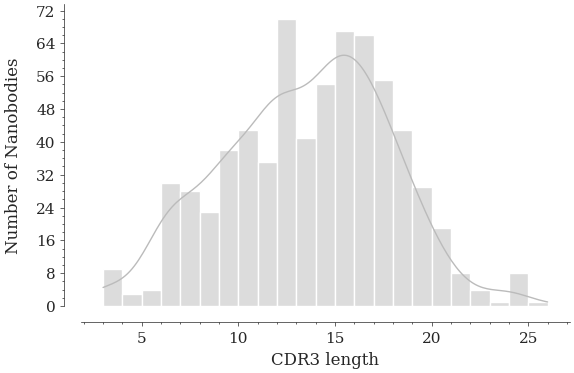

In [25]:
fig = plt.figure(figsize=(6, 4))

ax = sns.histplot(data=cdr3_length_df, palette=['#BBBBBB'], kde=True, binwidth=1)

# set xlabel
ax.set_xlabel('CDR3 length')
ax.set_ylabel('Number of Nanobodies', labelpad=10)

# disable legend
ax.legend([],[], frameon=False)

# set new positions for axes
ax.spines['left'].set_position(('data', 1))
ax.spines['bottom'].set_position(('data', -4))

# despine top and right
sns.despine(top=True, right=True)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

plt.savefig('figures/figureS5.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS5.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S5.** CDR3 length distribution of non-redundant Nbs structures in the Protein Data Bank.

## Figure 6

In [26]:
conf_rmsd = pd.read_csv('csv_data/confidence_vs_rmsd.csv', index_col=0)
conf_rmsd

,PDB,model,Fragment,Confidence,RMSD
2,7n9c_D,YS,CDR1,84.184545,2.2
3,7n9c_D,ESM,CDR1,83.454545,1.9
4,7n9c_D,IF,CDR1,0.711818,2.0
5,7n9c_D,AF2,CDR1,86.626364,1.7
6,7n9c_D,OF,CDR1,82.578182,1.9
...,...,...,...,...,...
2559,7r4q_D,ESM,Fw,92.454545,0.6
2560,7r4q_D,IF,Fw,0.373523,0.7
2561,7r4q_D,AF2,Fw,95.523636,0.6
2562,7r4q_D,OF,Fw,96.625000,0.6


In [27]:
excluded_pdbs = {'AF2': ['7tpr_D', '7r20_B', '7kd0_C', '7rnn_C'],
                 'OF': ['7tpr_D', '7r20_B', '7s7r_B', '7rnn_C'],
                 'OFr4': ['7tpr_D', '7r20_B', '7s7r_B', '7rnn_C'],
                 'IF': ['7tpr_D', '7d8b_B', '7d6y_B', '7d4b_B', '7r20_B', '7s7r_B', '7sl9_B', '7apj_B', '7ndf_C'],
                 'ESM': [],
                 'YS': []}
d = []
for x in ['AF2', 'OF', 'OFr4', 'IF', 'ESM', 'YS']:
    for y in ['Fw', 'CDR1', 'CDR2', 'CDR3']:
        f = []
        df_base = conf_rmsd[(conf_rmsd['Fragment'] == y) & (conf_rmsd['model'] == x)]
        
        pearson, ppvalue = stats.pearsonr(
            df_base['Confidence'],
            df_base['RMSD'])
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            df_base['Confidence'],
            df_base['RMSD'])
        
        spearman, spvalue = stats.spearmanr(
            df_base['Confidence'],
            df_base['RMSD'])
        
        d.append([x, y, pearson, ppvalue, spearman, spvalue, slope, intercept])


corr = pd.DataFrame(data=d, columns=['Model', 'Region', 'Pearson', 'Pearson p-value', 'Spearman', 'Spearman p-value', 'Slope', 'Intercept'])
corr

,Model,Region,Pearson,Pearson p-value,Spearman,Spearman p-value,Slope,Intercept
0,AF2,Fw,-0.117960,3.134894e-01,-0.144843,2.150288e-01,-0.039607,4.516624
1,AF2,CDR1,-0.624733,2.096262e-09,-0.682884,1.491097e-11,-0.109333,11.340084
2,AF2,CDR2,-0.535375,7.461210e-07,-0.415184,2.123329e-04,-0.112106,11.496596
3,AF2,CDR3,-0.587447,3.019785e-08,-0.632638,1.137011e-09,-0.167206,16.648974
4,OF,Fw,-0.216594,6.197460e-02,-0.260855,2.379523e-02,-0.039636,4.469822
5,OF,CDR1,-0.589830,2.572098e-08,-0.617739,3.550929e-09,-0.082127,8.680362
6,OF,CDR2,-0.444191,6.550312e-05,-0.470183,2.078275e-05,-0.070140,7.440093
7,OF,CDR3,-0.616086,4.014630e-09,-0.713186,7.021641e-13,-0.129211,12.869135
8,OFr4,Fw,-0.155272,1.834549e-01,-0.215539,6.328818e-02,-0.025059,3.070806
9,OFr4,CDR1,-0.545344,4.209218e-07,-0.604323,9.419902e-09,-0.080396,8.475405


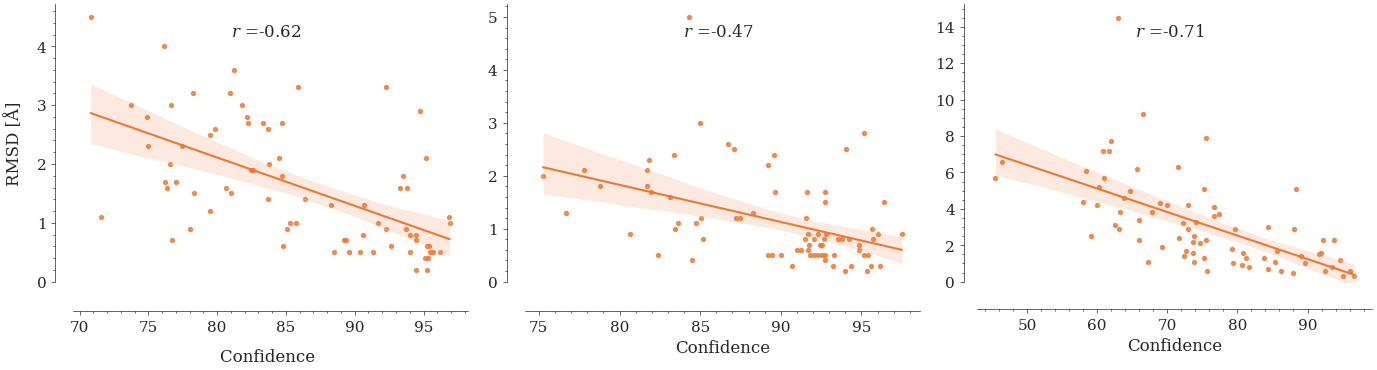

In [28]:
fig, axs = plt.subplots(1,3, figsize=(14,4))

sns.regplot(data=conf_rmsd[(conf_rmsd['model'] == 'OF') & (conf_rmsd['Fragment'] == 'CDR1')], 
            x='Confidence', y='RMSD', fit_reg=True, color=model_colors['OF'], 
            scatter_kws={'edgecolors': None, 's': 8},
            ax=axs[0])

sns.regplot(data=conf_rmsd[(conf_rmsd['model'] == 'OF') & (conf_rmsd['Fragment'] == 'CDR2')], 
            x='Confidence', y='RMSD', fit_reg=True, color=model_colors['OF'], 
            scatter_kws={'edgecolors': None, 's': 8},
            ax=axs[1])

sns.regplot(data=conf_rmsd[(conf_rmsd['model'] == 'OF') & (conf_rmsd['Fragment'] == 'CDR3')], 
            x='Confidence', y='RMSD', fit_reg=True, color=model_colors['OF'], 
            scatter_kws={'edgecolors': None, 's': 8},
            ax=axs[2])

for ax in axs:
    sns.despine(ax=ax, right=True, top=True)
    ax.set_ylabel('')
    
axs[0].set_ylabel('RMSD [Å]', labelpad=10)
axs[0].set_xlabel('Confidence ', labelpad=10)

# change axes positions
axs[0].set_ylim(0)
axs[0].spines['left'].set_position(('data', 68.25))
axs[0].spines['bottom'].set_position(('data', -0.5))

axs[1].set_ylim(0)
axs[1].spines['left'].set_position(('data', 73))
axs[1].spines['bottom'].set_position(('data', -0.55))

axs[2].set_ylim(0)
axs[2].spines['left'].set_position(('data', 41))
axs[2].spines['bottom'].set_position(('data', -1.5))

axs[0].annotate('$\it{r}$ =-0.62', (0.4, 0.90), xycoords='axes fraction', va='center')
axs[1].annotate('$\it{r}$ =-0.47', (0.4, 0.90), xycoords='axes fraction', va='center')
axs[2].annotate('$\it{r}$ =-0.71', (0.4, 0.90), xycoords='axes fraction', va='center')
    
plt.tight_layout()

plt.savefig('figures/figure6.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figure6.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 6.** Correlation between the RMSD values and the average predicted confidences by the OF model for the CDR regions in the 75 Nbs conforming the dataset. Regression lines relating the RMSD, and the average predicted confidence variables are shown as orange lines. Translucent bands around the regression lines indicate the 95% confidence interval for the regression estimates. Spearman correlation coefficients are shown in the graphs. In all cases, p-value < 0.05.

## Figure S7

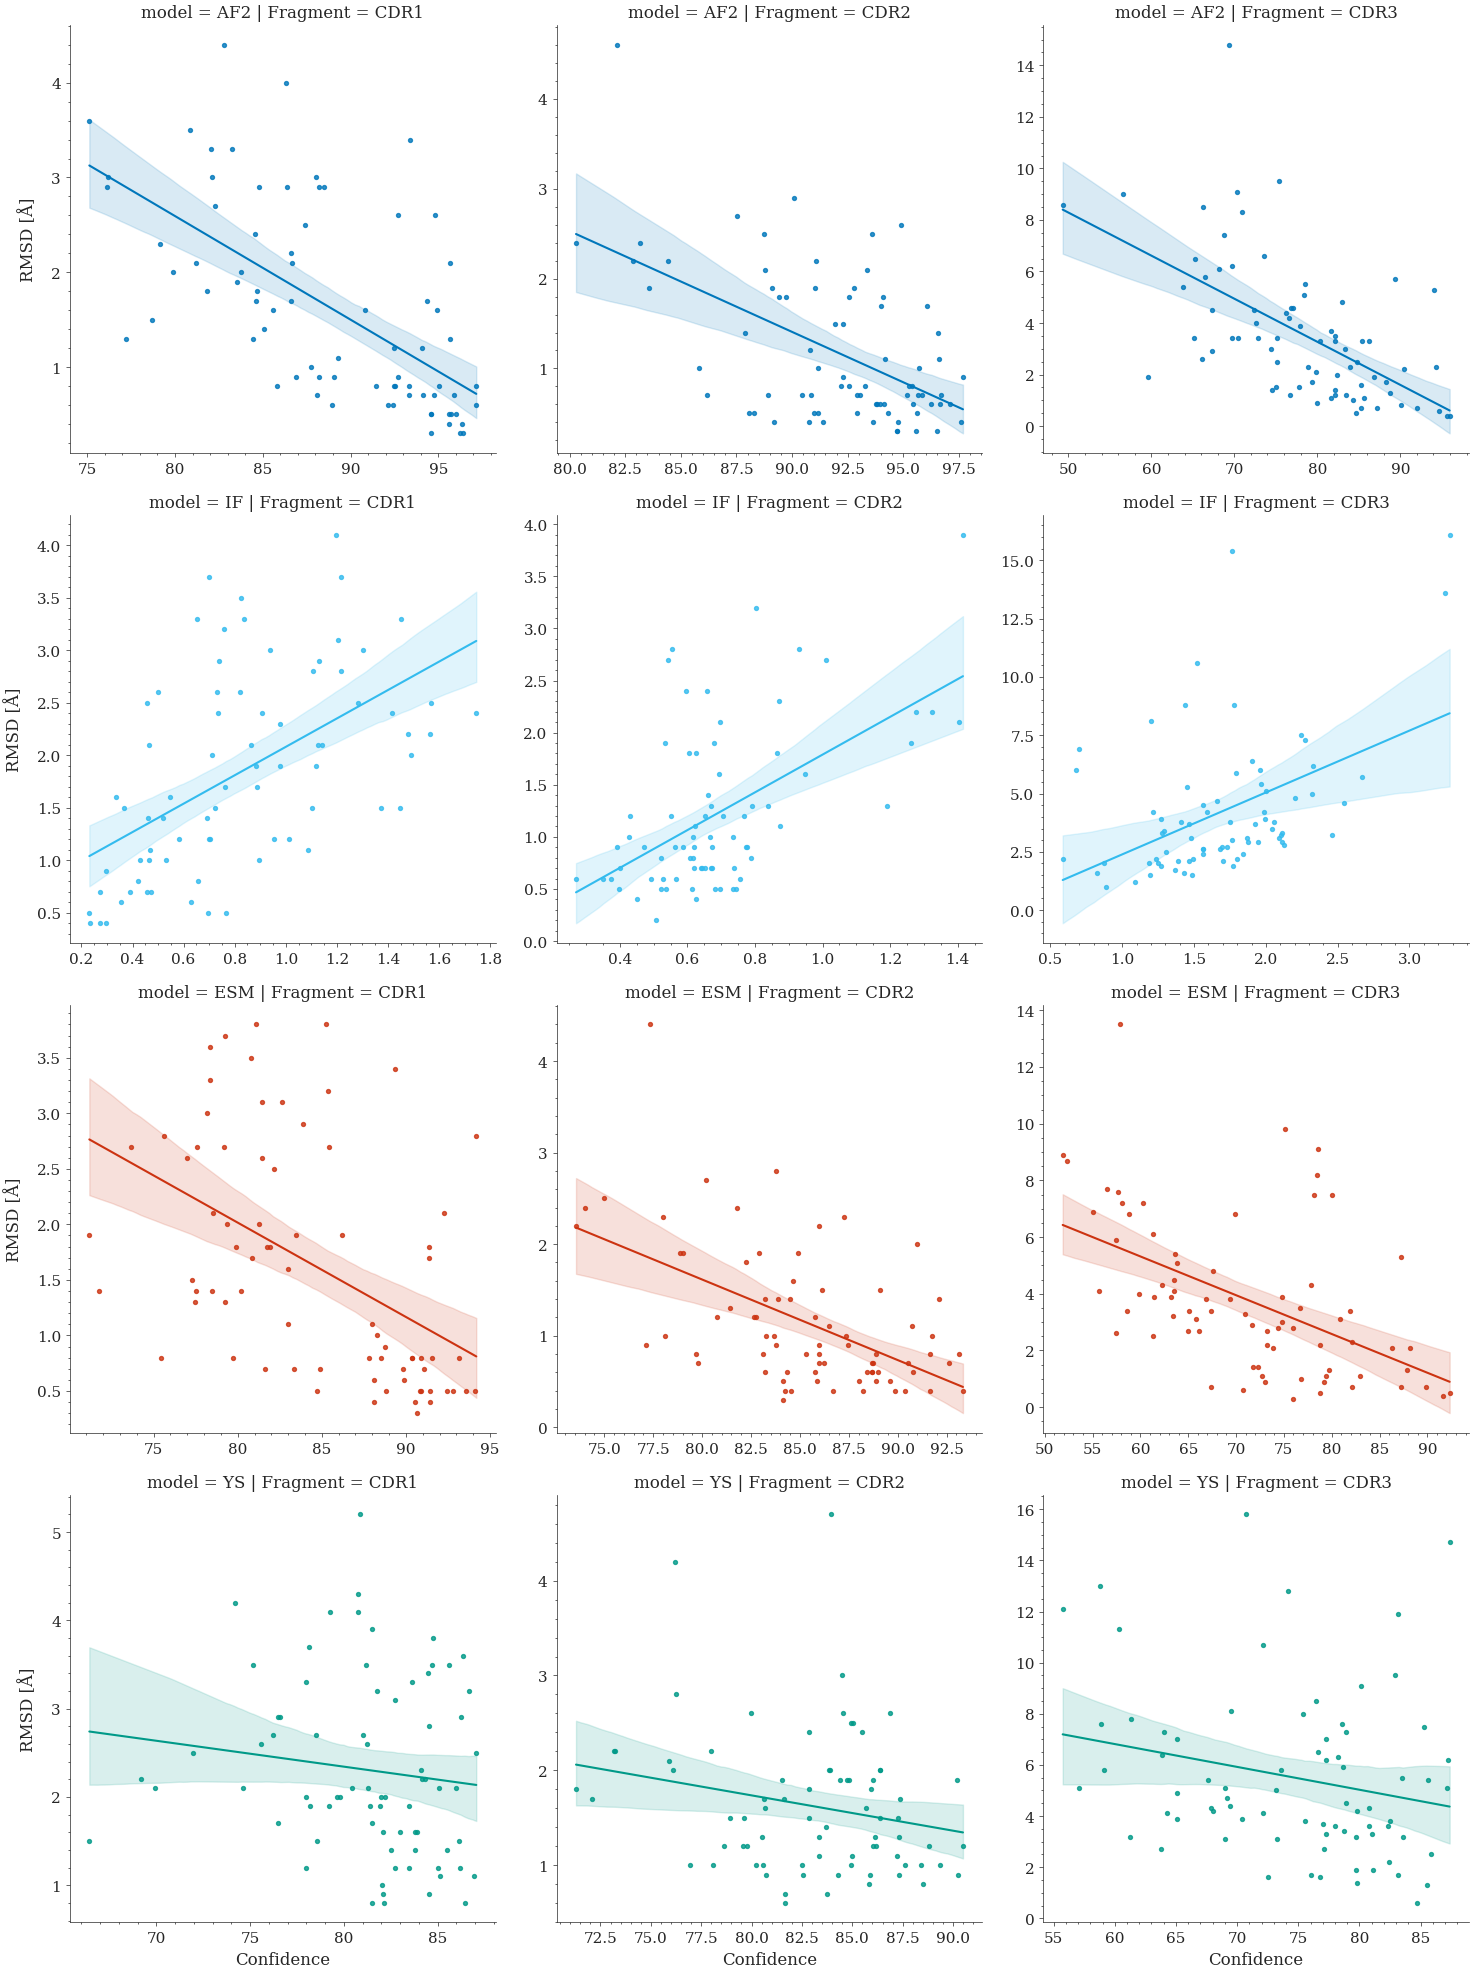

In [29]:
data=conf_rmsd[~((conf_rmsd['model']=='OF') | (conf_rmsd['model']=='OFr4') |(conf_rmsd['Fragment']=='Fw'))]

ax = sns.lmplot(
    data=data, x="Confidence", y="RMSD", row_order=['AF2', 'IF', 'ESM', 'YS'],
    col="Fragment", row="model", facet_kws={'sharex': False, 'sharey': False},
    scatter_kws={'edgecolors': None, 's': 8}
    )

for ax in [ax.figure.axes[0], ax.figure.axes[3], ax.figure.axes[6], ax.figure.axes[9]]:
    ax.set_ylabel('RMSD [Å]', labelpad=10)

for i in range(3):
    ax.figure.axes[i].get_children()[0].set_color(model_colors['AF2'])
    ax.figure.axes[i].get_children()[1].set_color(model_colors['AF2'])
    ax.figure.axes[i].get_children()[2].set_color(model_colors['AF2'])
    
for i in range(3, 6):
    ax.figure.axes[i].get_children()[0].set_color(model_colors['IF'])
    ax.figure.axes[i].get_children()[1].set_color(model_colors['IF'])
    ax.figure.axes[i].get_children()[2].set_color(model_colors['IF'])
    
for i in range(6, 9):
    ax.figure.axes[i].get_children()[0].set_color(model_colors['ESM'])
    ax.figure.axes[i].get_children()[1].set_color(model_colors['ESM'])
    ax.figure.axes[i].get_children()[2].set_color(model_colors['ESM'])
    
for i in range(9, 12):
    ax.figure.axes[i].get_children()[0].set_color(model_colors['YS'])
    ax.figure.axes[i].get_children()[1].set_color(model_colors['YS'])
    ax.figure.axes[i].get_children()[2].set_color(model_colors['YS'])
    
plt.tight_layout()

plt.savefig('figures/figureS11.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS11.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S7.** Correlation between the RMSD values and the average predicted confidences by AI models for the CDR regions in the 75 Nbs conforming the dataset. Regression lines relating the RMSD and the average predicted confidence variables are shown in different colors depending on the AI model used. Translucent bands around the regression lines indicate the 95% confidence interval for the regression estimates. 

## Figure S8

In [30]:
mdf = rmsd_by_region[
        # (rmsd_by_region['model'].isin(['AF2', 'NN', 'AF2r10', 'AF2m', 'OF'])) &
        (rmsd_by_region['model'].isin(['AF2', 'AF2r10', 'OF', 'OFr4', 'OFr20'])) &
        (rmsd_by_region['rmsd atoms'].isin(['ca']))
	]
pm = []
for x in mdf['model']:
	if x.startswith('AF2'):
		pm.append('AlphaFold2')
	else:
		pm.append('OmegaFold')
mdf['parent'] = pm
mdf

,PDB,model,Fragment,rmsd atoms,RMSD,parent
45,7n9c_D,AF2r10,Fw,ca,1.4,AlphaFold2
48,7n9c_D,AF2r10,CDR1,ca,1.7,AlphaFold2
51,7n9c_D,AF2r10,CDR2,ca,1.2,AlphaFold2
54,7n9c_D,AF2r10,CDR3,ca,4.1,AlphaFold2
57,7n9c_D,AF2r10,Global,ca,2.0,AlphaFold2
...,...,...,...,...,...,...
21465,7r4q_D,OFr4,Fw,ca,0.7,OmegaFold
21468,7r4q_D,OFr4,CDR1,ca,3.3,OmegaFold
21471,7r4q_D,OFr4,CDR2,ca,0.5,OmegaFold
21474,7r4q_D,OFr4,CDR3,ca,4.0,OmegaFold


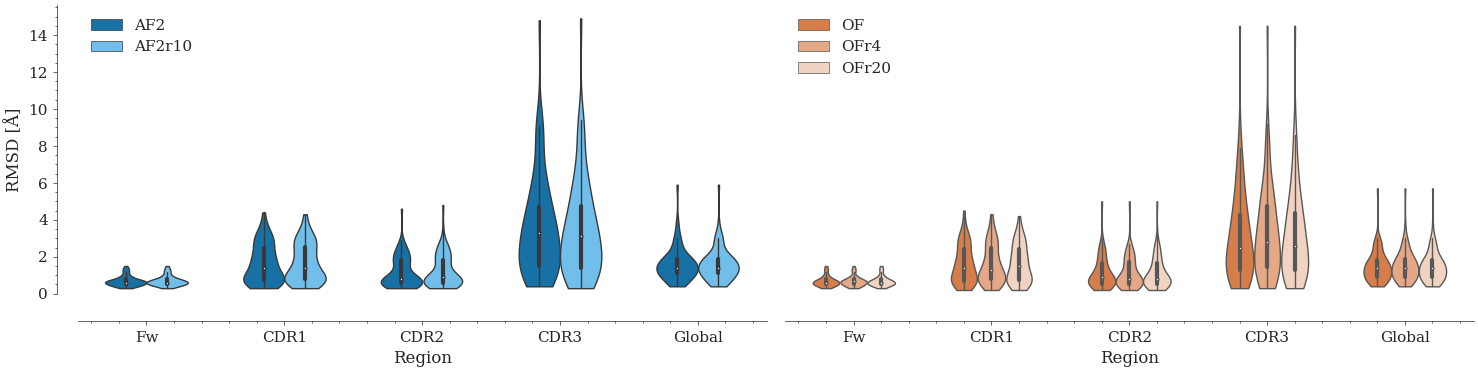

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4), sharey=True)

# use lighten-color in https://mdigi.tools/lighten-color/#ee7733 to get lighter colors for models with different parms

sns.violinplot(data=mdf[mdf['parent'].str.contains('AlphaFold2')], x="Fragment", y="RMSD",
               hue="model", cut=0, width=0.6, palette=[model_colors['AF2'], '#5dc4ff'],
               hue_order=['AF2', 'AF2r10'],
               ax=ax1)

sns.violinplot(data=mdf[mdf['parent'].str.contains('OmegaFold')], x="Fragment", y="RMSD",
               hue="model", cut=0, width=0.6, palette=[model_colors['OF'], '#f4a476', '#f9d1ba'],
               hue_order=['OF', 'OFr4', 'OFr20'],
               ax=ax2)

# set ylabel
ax1.set_ylabel('RMSD [Å]')
ax1.set_xlabel('Region')

# despine axes
sns.despine(ax=ax1, top=True, right=True)
sns.despine(ax=ax2, top=True, right=True, left=True)

# change legend locations
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# disable y tick params
ax2.tick_params(axis='y', which='both', left=False)

# change ylabel
ax2.set_ylabel('')
ax2.set_xlabel('Region')

# set ylim
ax1.set_ylim(0)

# set new positions for axes
ax1.spines['left'].set_position(('data', -0.65))
ax1.spines['bottom'].set_position(('data', -1.5))
ax2.spines['bottom'].set_position(('data', -1.5))

plt.tight_layout()

plt.savefig('figures/figureS7.png', dpi=300, format='png', bbox_inches="tight", facecolor='white', edgecolor=None)
plt.savefig('figures/figureS7.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S8.** Comparison of the RMSD distribution for the models obtained varying the number of recycles of AlphaFold2 and OmegaFold. The RMSD distributions are represented by a violin plot. It combines the kernel density plot (outer) to show the distribution of values and a boxplot (inner) that summarizes the distribution statistics.
The boxplot is composed of the white dot representing the median, the thick gray bar in the center representing the interquartile range, and the thin gray line representing the rest of the distribution. No statistically significant differences were found between the models obtained with the default parameters and those obtained with varying the number of recycles of AlphaFold2 and OmegaFold.

## Figure S10

In [32]:
afm_index = rmsd_by_region_cdr3[rmsd_by_region_cdr3['model'].isin(['AF2m'])]['PDB'].unique()
ds = rmsd_by_region_cdr3[(rmsd_by_region_cdr3['model'].isin(['AF2', 'AF2m'])) &
              (rmsd_by_region_cdr3['rmsd atoms'] == 'ca') &
              (rmsd_by_region_cdr3['Fragment'] == 'CDR3') &
              (rmsd_by_region_cdr3['PDB'].isin(afm_index))].sort_values('CDR3 length')
col_f = ds[ds['model'] == 'AF2']['CDR3 length'].value_counts().sort_index()

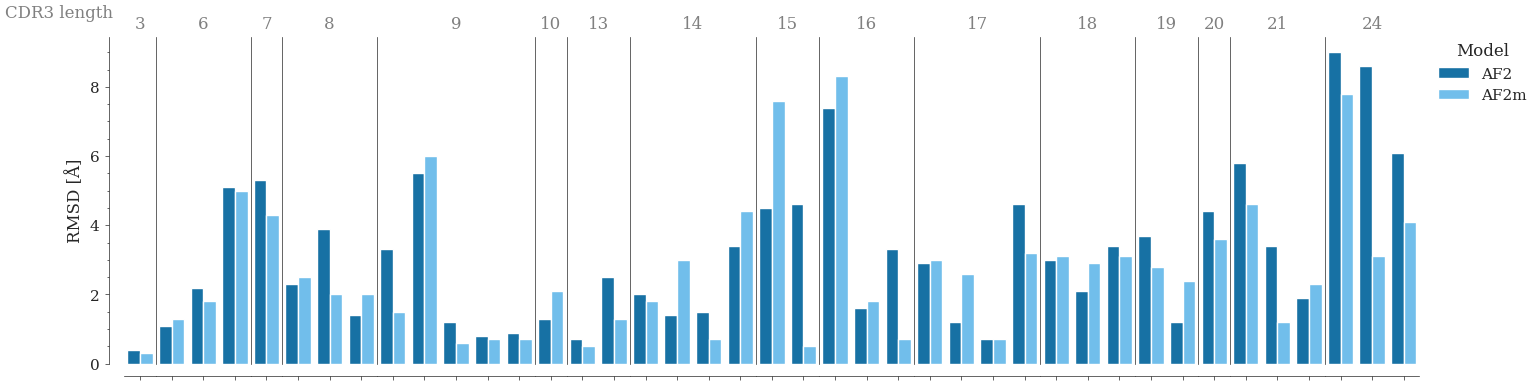

In [33]:
fig, axes = plt.subplots(1,16, figsize=(15, 4), sharey=True,
                         gridspec_kw={'width_ratios': [x/col_f.sum() for x in col_f], 'wspace': 0},
                         )
for c, l in enumerate(ds["CDR3 length"].unique()):
	fig0 = sns.barplot(data=ds[ds["CDR3 length"] == l].sort_values('CDR3 length'), x='PDB', y='RMSD', 
                       hue='model',
                       hue_order=['AF2', 'AF2m'], palette=[model_colors['AF2'], '#5dc4ff'],
                       ax=axes[c]
	             )
	fig0.tick_params(axis='y', which='both', left=False)
	fig0.tick_params(axis='x', which='minor', bottom=False)
    
	fig0.legend().set_visible(False)
    
	sns.despine(ax=fig0, top=True, right=True)

	fig0.set_title(l, color='gray')
	if c:
		fig0.set_ylabel('')
	if c != 4:
		fig0.legend_.remove()
	fig0.set_xlabel('')
	for tick in fig0.get_xticklabels():
		tick.set_rotation(90)
		tick.set_fontsize(12)
	for tick in fig0.get_yticklabels():
		# tick.set_rotation(90)
		tick.set_fontsize(12)

# change ylabel
axes[0].set_ylabel('RMSD [Å]')

# disable y tick params
axes[0].tick_params(axis='y', which='both', left=True)

# change legend loc
plt.legend(bbox_to_anchor=(1.05, 1.025), title='Model')

# set new positions for axes 
axes[0].spines['left'].set_position(('data', -1))

for i in range(len(axes)):
    axes[i].spines['bottom'].set_position(('data', -0.35))
    
    axes[i].set_xticklabels([x.get_text() for x in axes[i].get_xticklabels()], rotation=90)
    
fig.text(-0.03, 0.95, 'CDR3 length', color='gray')

plt.tight_layout()

plt.savefig('figures/figureS9.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS9.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S10.** Comparison between the RMSD of models generated with AlphaFold2 (AF2) and AlphaFold-multimer (AF2m) clustered by CDR3 length.

## Figure S11

In [34]:
rmsd_by_region['model'].unique()

array(['IF', 'ESMem', 'ESM', 'AF2r10', 'NNem', 'IFem', 'YSem', 'OF',
       'AF2', 'OFem', 'NN', 'OFr20em', 'OFr20', 'AF2em', 'YS', 'AF2r10em',
       'OFr4em', 'OFr4', 'AF2m', 'AF2mem'], dtype=object)

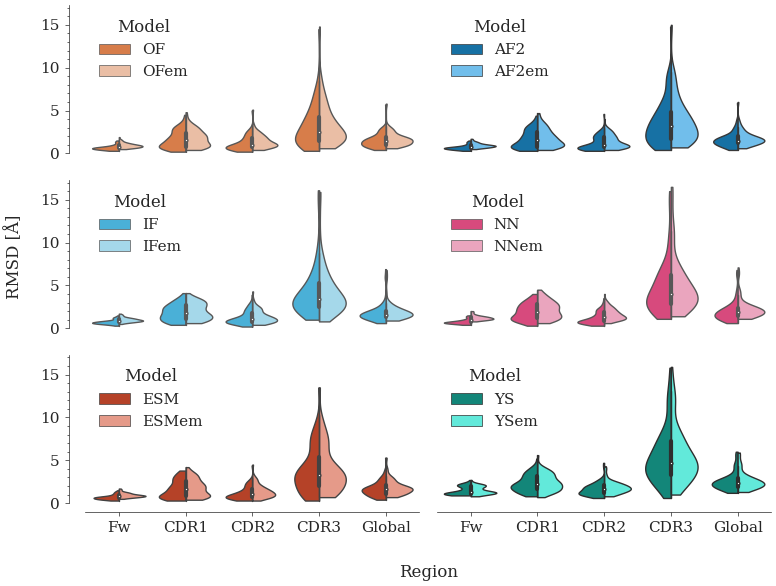

In [35]:
fig, axs = plt.subplots(3,2, figsize=(8,6), sharey=True, sharex=True)

sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['rmsd atoms'].isin(['ca'])) &
        (rmsd_by_region['model'].isin(['OF', 'OFem']))],
    y="RMSD",
    x="Fragment",
    hue="model", split=True, hue_order=['OF', 'OFem'], cut=0,
    palette=[model_colors['OF'], '#f6bb99'], ax=axs[0][0]
                 )

sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['rmsd atoms'].isin(['ca'])) &
        (rmsd_by_region['model'].isin(['AF2', 'AF2em']))],
    y="RMSD",
    x="Fragment",
    hue="model", split=True, hue_order=['AF2', 'AF2em'], cut=0,
    palette=[model_colors['AF2'], '#5dc4ff'], ax=axs[0][1]
                 )

sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['rmsd atoms'].isin(['ca'])) &
        (rmsd_by_region['model'].isin(['IF', 'IFem']))],
    y="RMSD",
    x="Fragment",
    hue="model", split=True, hue_order=['IF', 'IFem'], cut=0,
    palette=[model_colors['IF'], '#99ddf6'], ax=axs[1][0]
                 )

sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['rmsd atoms'].isin(['ca'])) &
        (rmsd_by_region['model'].isin(['NN', 'NNem']))],
    y="RMSD",
    x="Fragment",
    hue="model", split=True, hue_order=['NN', 'NNem'], cut=0,
    palette=[model_colors['NN'], '#f699bb'], ax=axs[1][1]
                 )

sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['rmsd atoms'].isin(['ca'])) &
        (rmsd_by_region['model'].isin(['ESM', 'ESMem']))],
    y="RMSD",
    x="Fragment",
    hue="model", split=True, hue_order=['ESM', 'ESMem'], cut=0,
    palette=[model_colors['ESM'], '#f4907a'], ax=axs[2][0]
                 )

sns.violinplot(data=rmsd_by_region[
        (rmsd_by_region['rmsd atoms'].isin(['ca'])) &
        (rmsd_by_region['model'].isin(['YS', 'YSem']))],
    y="RMSD",
    x="Fragment",
    hue="model", split=True, hue_order=['YS', 'YSem'], cut=0,
    palette=[model_colors['YS'], '#4cffeb'], ax=axs[2][1]
                 )

for ax in axs.flatten():
    ax.legend(loc='upper left', title='Model')
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0)
    sns.despine(ax=ax, top=True, right=True)

# despine axes and disable ticks
sns.despine(ax=axs[0][0], top=True, right=True, bottom=True)
axs[0][0].tick_params(axis='x', which='major', bottom=False)

sns.despine(ax=axs[0][1], top=True, right=True, bottom=True, left=True)
axs[0][1].tick_params(axis='x', which='major', bottom=False)
axs[0][1].tick_params(axis='y', which='both', left=False)

sns.despine(ax=axs[1][0], top=True, right=True, left=False, bottom=True)
axs[1][0].tick_params(axis='x', which='major', bottom=False)

sns.despine(ax=axs[1][1], top=True, right=True, left=True, bottom=True)
axs[1][1].tick_params(axis='x', which='major', bottom=False)
axs[1][1].tick_params(axis='y', which='both', left=False)

sns.despine(ax=axs[2][1], top=True, right=True, left=True)
axs[2][1].tick_params(axis='y', which='both', left=False)

axs[0][0].spines['left'].set_position(('data', -0.75))
axs[1][0].spines['left'].set_position(('data', -0.75))
axs[2][0].spines['left'].set_position(('data', -0.75))

axs[2][0].spines['bottom'].set_position(('data', -1))
axs[2][1].spines['bottom'].set_position(('data', -1))

# add supra labels
fig.supylabel('RMSD [Å]', y=0.55, fontsize=12)
fig.supxlabel('Region', x=0.55, fontsize=12)
    
plt.tight_layout()

plt.savefig('figures/figureS10.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figureS10.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure S11.** Comparison of the RMSD distribution between the default generated model and its minimized version for OmegaFold, AlphaFold2, IgFold, Nanonet, ESMFold and Yang-server. The RMSD distributions are represented by a violin plot. It combines the kernel density plot (outer) to show the distribution of values and a boxplot (inner) that summarizes the distribution statistics. The boxplot is composed of the white dot representing the median, the thick gray bar in the center representing the interquartile range, and the thin gray line representing the rest of the distribution. No statistically significant differences were found between the models obtained with the default parameters and their minimized version.

## Figure 7

In [36]:
ct = pd.read_csv('csv_data/model_time.csv')
ct

,Unnamed: 0,AF2,AF2r10,NN,OF,OFr4,OFr20,IF,DA
0,7r20_B,255,502,5,30.37,11.51,57.58,6.12,199
1,7p6k_G,237,510,5,28.50,11.00,55.14,6.00,185
2,7apj_B,199,501,5,29.55,11.19,56.19,6.38,124
3,7r4q_D,243,500,6,33.32,12.95,63.61,6.35,157
4,7l6v_B,236,501,5,30.11,11.44,57.24,6.28,165
...,...,...,...,...,...,...,...,...,...
70,7l6v_C,241,500,6,34.05,12.95,64.88,6.48,175
71,7oan_F,247,500,5,33.26,12.71,63.46,6.26,194
72,7t5f_B,259,502,5,30.30,11.51,57.57,6.36,165
73,7p5y_G,247,502,6,33.29,13.20,63.60,6.41,159


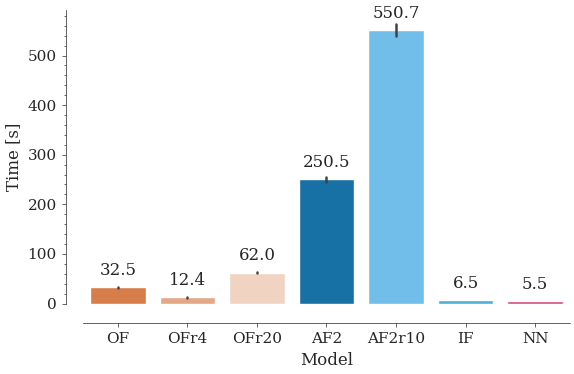

In [37]:
fig = plt.figure(figsize=(6,4))

df = ct.median().round(1).sort_values()
df = df.append(pd.Series([0.]))
ax = sns.barplot(data=ct, palette=[model_colors['OF'], '#f4a476', '#f9d1ba',
                                   model_colors['AF2'], '#5dc4ff',
                                   model_colors['IF'],
                                   model_colors['NN']],
                 order=['OF', 'OFr4', 'OFr20', 'AF2', 'AF2r10', 'IF', 'NN'])

# add bar labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f', padding=6)

# disable x tick params
ax.tick_params(axis='x', which='minor', bottom=False)

# despine axes
sns.despine(ax=ax, top=True, right=True)

# change axes positions
ax.spines['left'].set_position(('data', -0.75))
ax.spines['bottom'].set_position(('data', -40))

# set labels
ax.set_ylabel('Time [s]')
ax.set_xlabel('Model')

plt.tight_layout()

plt.savefig('figures/figure7.png', dpi=300, format='png', facecolor='white', edgecolor=None)
plt.savefig('figures/figure7.svg', dpi=300, format='svg', facecolor='white', edgecolor=None)

**Figure 7.** Computation time for the generation of a structural Nb model for with OmegaFold, AlphaFold2, IgFold, and Nanonet. Computation times for OmegaFold and AlphaFold with different recycles are also included.